<a href="https://colab.research.google.com/github/kkiprono4/Churn/blob/main/Final2_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-commerce Customer Churn Prediction**

## **Defining the Question**


### **Specifying the question**

Build a model that determines whether or not a customer churns.

Models to use:


1.   Random Forest 
2.   Gradient Boost
3.   Support Vector Machine

##**Defining the Metric for Success**
Because we are creating a classification model, our metric of success will be model accuracy score. We will set the minumum accuracy score at 90%.

##**Understanding the Context**
Customer churn - also known as customer attrition – is when a customer stops using/buying your products or services.

It’s a measure of the number of customers leaving a business over a specific period of time. 

Customer churn is something that every business has to deal with because customers always come and go, but if churn is left unchecked, it can greatly impact your revenue in the long run.

##**Recording the experimental design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate recording your observations.

6. Performing *Random forest, Gradient Boost and SVM*

7. Challenging the Solution using *KNN*

8. Conclusion

9. Recommendations 

## **Dataset glossary**


E Comm CustomerID Unique customer ID

E Comm Churn Churn Flag

E Comm Tenure Tenure of customer in organization

E Comm PreferredLoginDevice Preferred login device of customer

E Comm CityTier City tier

E Comm WarehouseToHome Distance in between warehouse to home of customer

E Comm PreferredPaymentMode Preferred payment method of customer

E Comm Gender Gender of customer

E Comm HourSpendOnApp Number of hours spend on mobile application or website

E Comm NumberOfDeviceRegistered Total number of deceives is registered on particular customer

E Comm PreferedOrderCat Preferred order category of customer in last month

E Comm SatisfactionScore Satisfactory score of customer on service

E Comm MaritalStatus Marital status of customer

E Comm NumberOfAddress Total number of added added on particular customer

E Comm Complain Any complaint has been raised in last month

E Comm OrderAmountHikeFromlastYear Percentage increases in order from last year

E Comm CouponUsed Total number of coupon has been used in last month

E Comm OrderCount Total number of orders has been places in last month

E Comm DaySinceLastOrder Day Since last order by customer

E Comm CashbackAmount Average cashback in last month

# **Reading the Data**

link to our dataset https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
churn = pd.read_excel('/content/E Commerce Dataset.xlsx')

In [ ]:
# Preview first five rows
churn.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Preview last five rows
churn.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [ ]:
# Check the shape of our data set
churn.shape

(5630, 20)

We have 5,630 records and 20 variables

In [ ]:
# Checking the column names in rank dataset
print('The column names in the rank dataset are :')
churn.columns

The column names in the rank dataset are :


Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# Confirm our dataset datatypes
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Our data is made up of float, object and integer datatypes

In [ ]:
# Checking statistical information
churn.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
# Check for null values in our dataset
churn.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

We have missing values in the Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed,OrderCount and DaySinceLastOrder variables  

In [ ]:
# Check total number of null values in our dataset
churn.isnull().sum().sum()

1856

We have a total of 1,856 null values in our dataset

In [ ]:
# Check for duplicates in our dataset
churn.duplicated().sum()

0

We have no duplicates in our dataframe

# **Data Cleaning**

In [ ]:
# Dealing with missing values 
# Checking the mumber of missing values by column and sorting for the smallest

Total = churn.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = churn.isnull().sum()/churn.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5
CustomerID,0,0.0
MaritalStatus,0,0.0
Complain,0,0.0


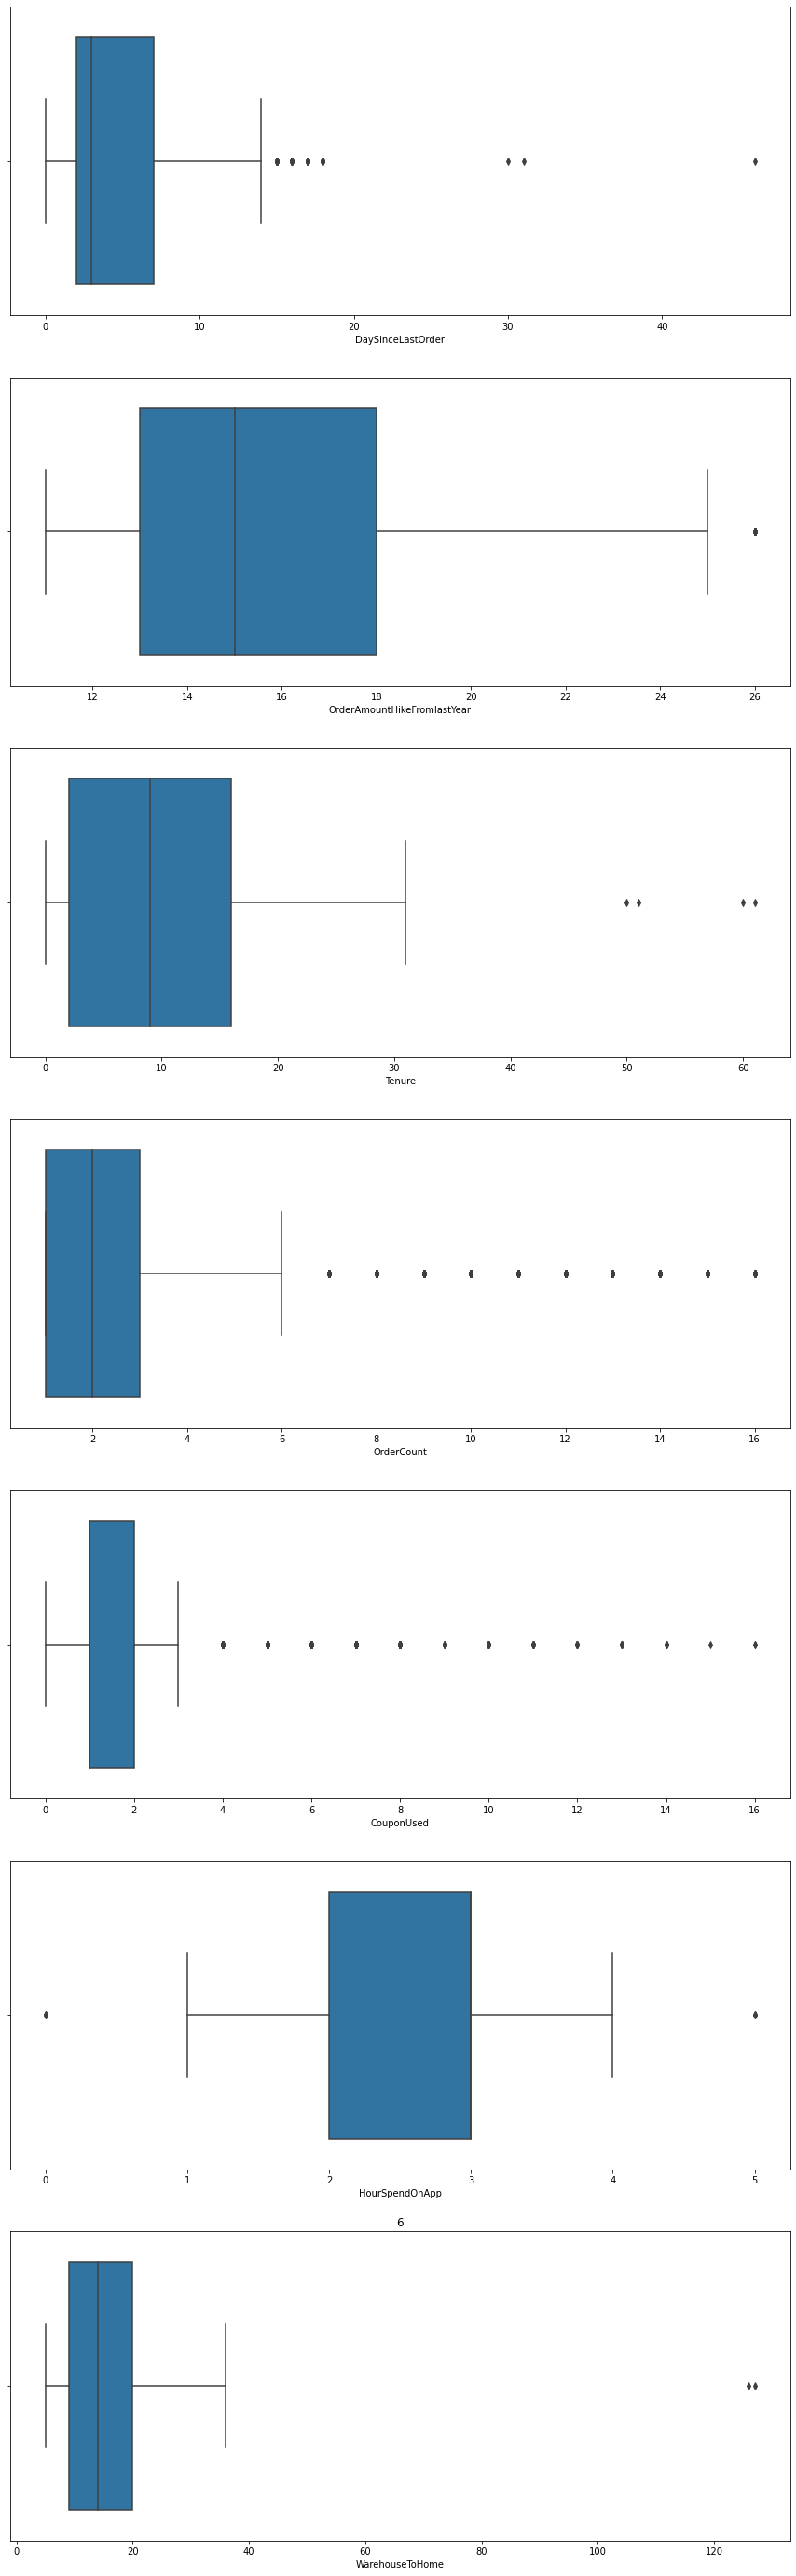

In [ ]:
# We will check for outliers in our numerical data in order to determine how we will fill our
# null values in these columns
columns = ['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp','WarehouseToHome']

fig, ax = plt.subplots(len(columns), figsize = (15,50))
for i, col_val in enumerate(columns):
  sns.boxplot(x = churn[col_val], ax=ax[i])
  plt.title(i)   
plt.show()

<Figure size 1000x300 with 0 Axes>

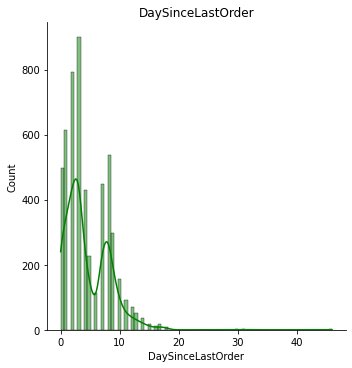

<Figure size 1000x300 with 0 Axes>

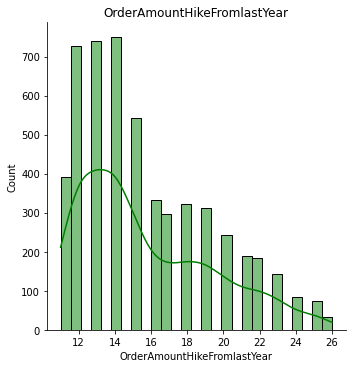

<Figure size 1000x300 with 0 Axes>

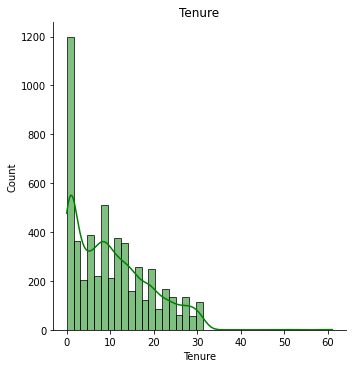

<Figure size 1000x300 with 0 Axes>

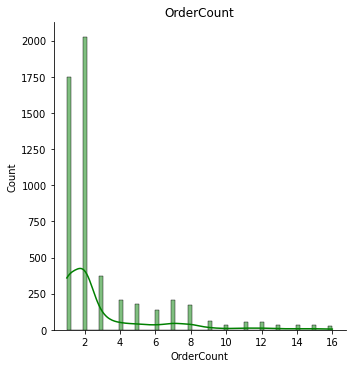

<Figure size 1000x300 with 0 Axes>

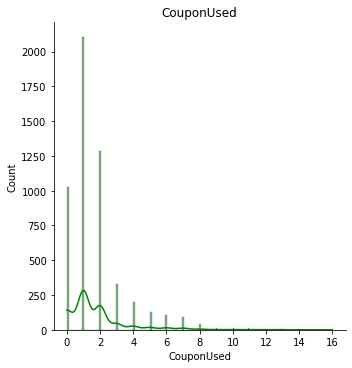

<Figure size 1000x300 with 0 Axes>

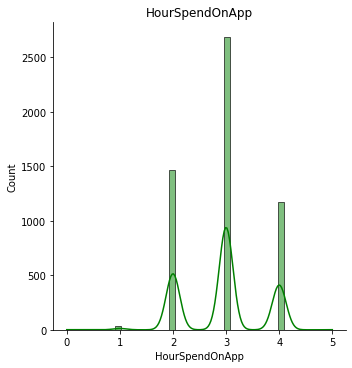

<Figure size 1000x300 with 0 Axes>

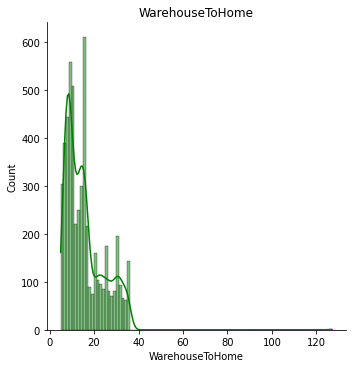

In [ ]:
# Plotting histograms to check the skewness of variables with missing values
for i in columns:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(churn[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

For symmetric data distribution, one can use the mean value for imputing missing values and for non symetric data distribution one can use median.This is because outliers data points will have a significant impact on the mean

In [ ]:
# Since HourSpendOnApp is fairly symmetrically distributed will replace them with mean
churn_clean = churn 
churn_clean['HourSpendOnApp'] = churn_clean['HourSpendOnApp'].fillna(churn_clean['HourSpendOnApp'].mean())

In [ ]:
# We will fill the rest of the missing values with median
col = ['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','WarehouseToHome']
for i in col:
  churn_clean[i] = churn_clean[i].fillna(churn_clean[i].median())

In [ ]:
# Confirm changes made 
churn_clean.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

We have successfully dealt with missing values 

In [ ]:
# Dealing with duplicates
churn_clean.duplicated().sum()

0

We have no duplicate values

In [ ]:
# Check for annomalies in our dataframe
for i in churn_clean.columns:
  print('Unique values in', i , 'are :')
  print(churn_clean[i].unique())
  print('***************************************************************************')
  print('                                                                  ')

Unique values in CustomerID are :
[50001 50002 50003 ... 55628 55629 55630]
***************************************************************************
                                                                  
Unique values in Churn are :
[1 0]
***************************************************************************
                                                                  
Unique values in Tenure are :
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
***************************************************************************
                                                                  
Unique values in PreferredLoginDevice are :
['Mobile Phone' 'Phone' 'Computer']
***************************************************************************
                                                                  
Unique values in CityTier are :
[3 1 2]
********************

We have a number of annomalies

CC is the same as credit card, COD the same as cash on delivery, mobile is also the same as mobile phone 

In [ ]:
# We will proceeding with renaming some of our records 
churn_clean.replace(['Phone','CC', 'COD', 'Mobile'], ['Mobile Phone','Credit Card','Cash on Delivery', 'Mobile Phone'], inplace = True)

In [ ]:
# Let's confirm the changes made 
for i in churn_clean.columns:
  print('Unique values in', i , 'are :')
  print(churn_clean[i].unique())
  print('***************************************************************************')
  print('                                                                  ')

Unique values in CustomerID are :
[50001 50002 50003 ... 55628 55629 55630]
***************************************************************************
                                                                  
Unique values in Churn are :
[1 0]
***************************************************************************
                                                                  
Unique values in Tenure are :
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
***************************************************************************
                                                                  
Unique values in PreferredLoginDevice are :
['Mobile Phone' 'Computer']
***************************************************************************
                                                                  
Unique values in CityTier are :
[3 1 2]
****************************

We have successfully dealt with our annomalies 

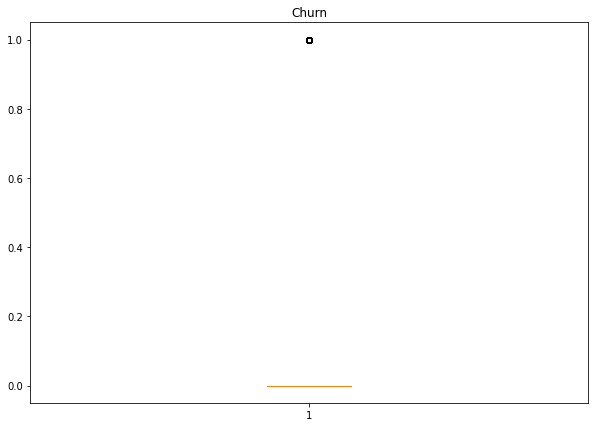

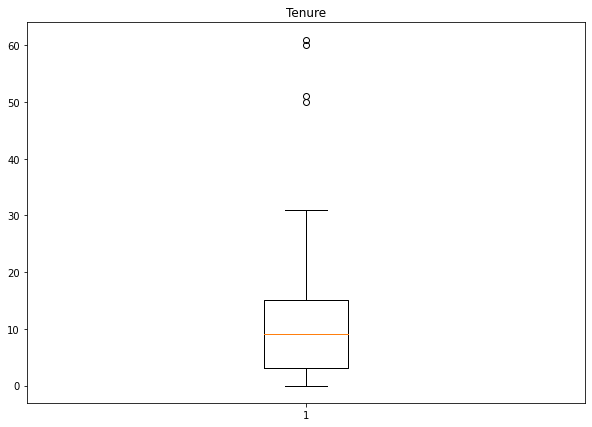

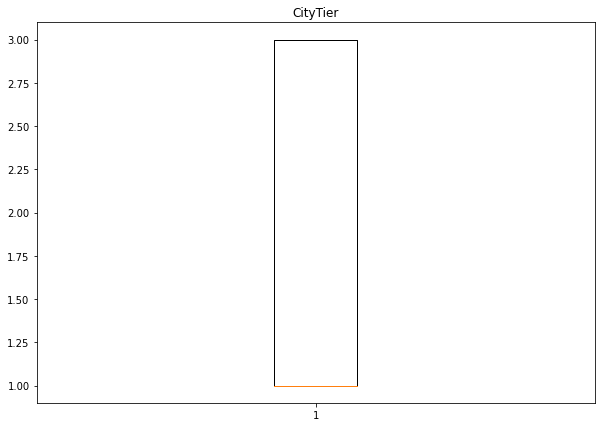

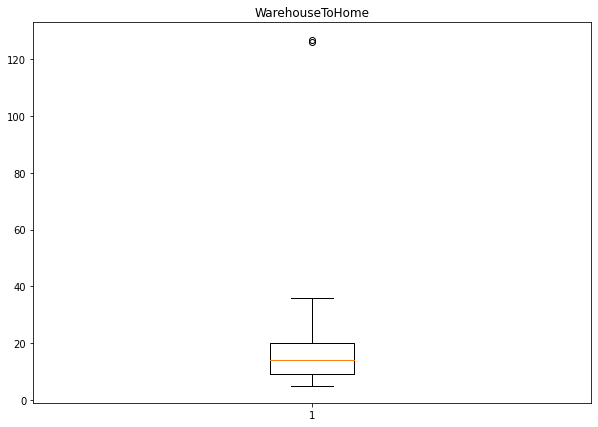

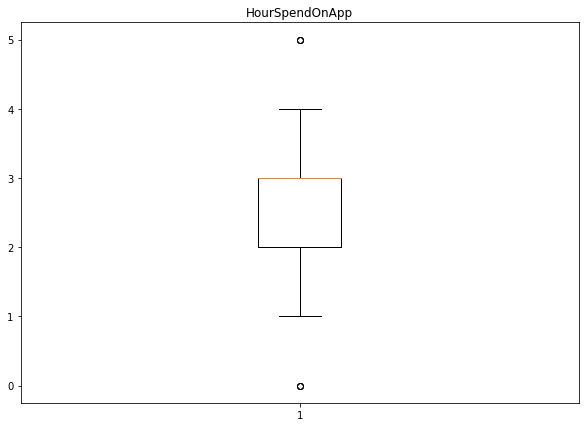

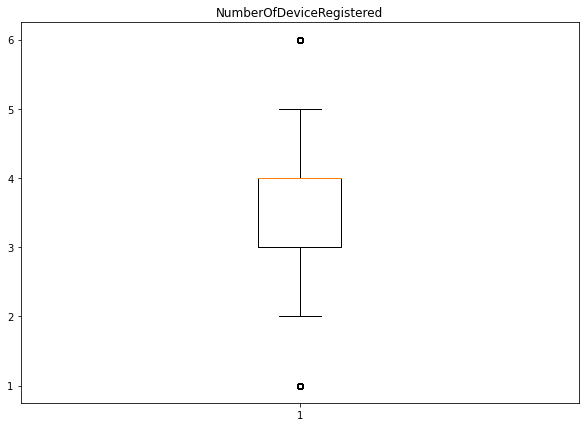

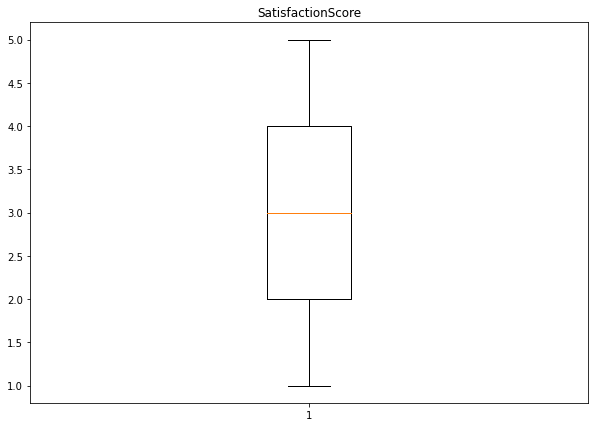

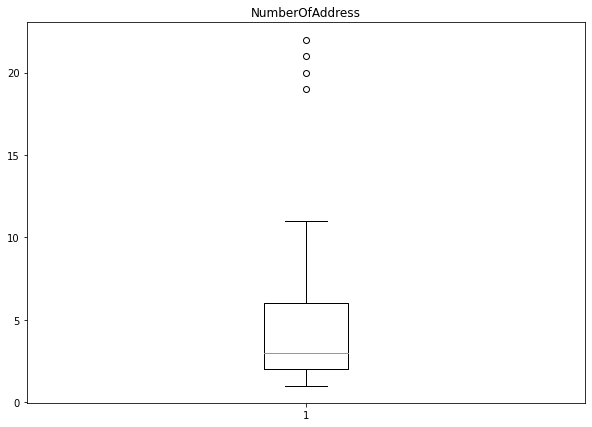

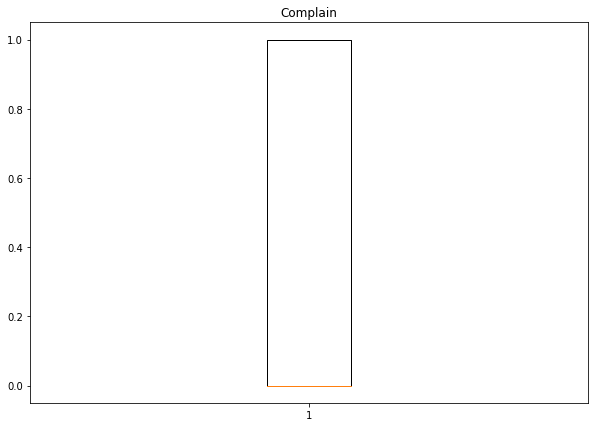

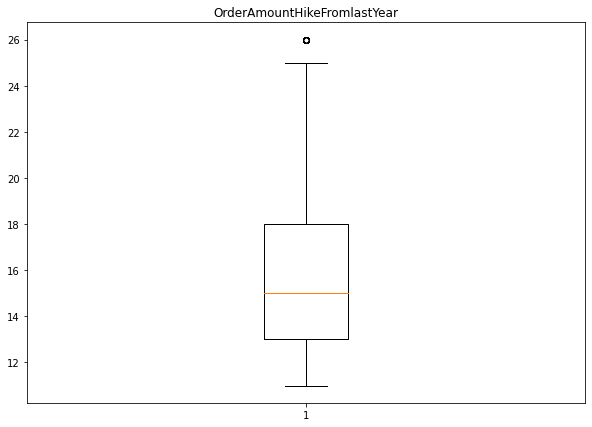

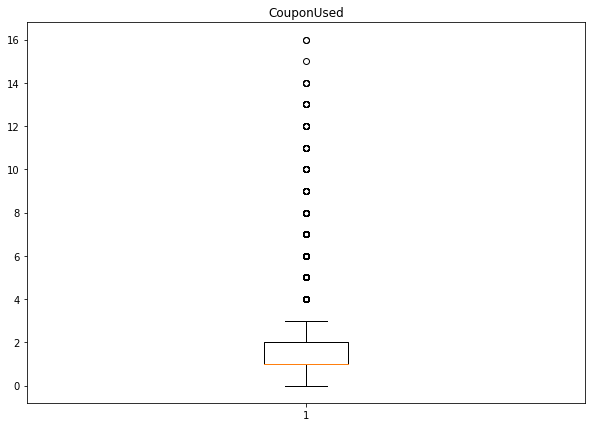

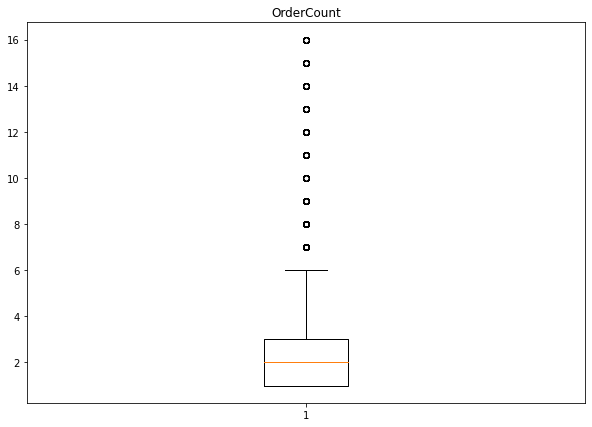

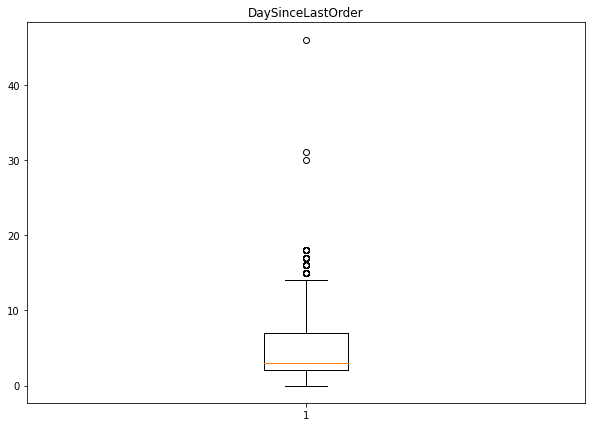

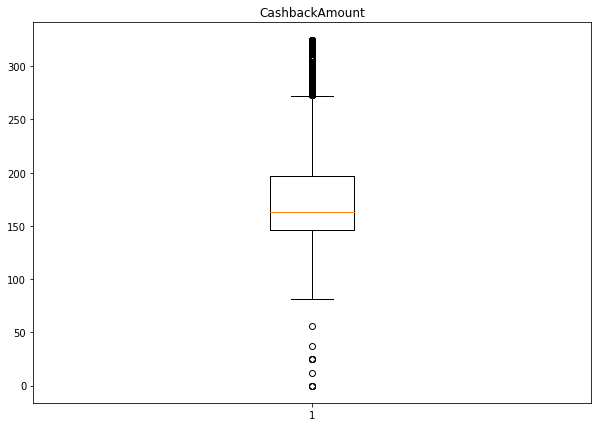

In [ ]:
# Check for outliers in our dataframe 
column = ['Churn','Tenure', 'CityTier',
       'WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered', 'SatisfactionScore',
        'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']
for i in column:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(churn_clean[i])
  plt.title(i)
  plt.show()

We have presence of outliers in our dataframe but will proceed without deleting them because they are true representation of real life situation

In [ ]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it
churn_clean.to_csv('E Commerce.csv')

# **Exploratory Data Analysis**

## **Univariate Analysis**

In [ ]:
# Checking the mean, standard deviation and quantiles of our dataframe
churn_clean.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.931535,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705384,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


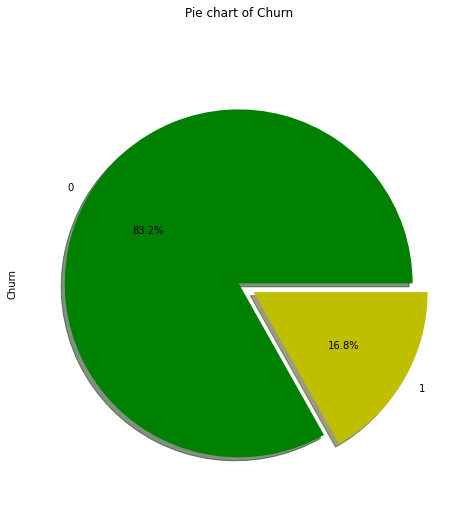

In [ ]:
# Pie chart on people who churned vs those who didn't
churn_clean['Churn'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['g','y'],figsize=(10,8),autopct='%1.1f%%')
plt.title("Pie chart of Churn", y=1.1)
plt.show()

83.2% of the people did not churn compared to those who churned who were 16.8%.

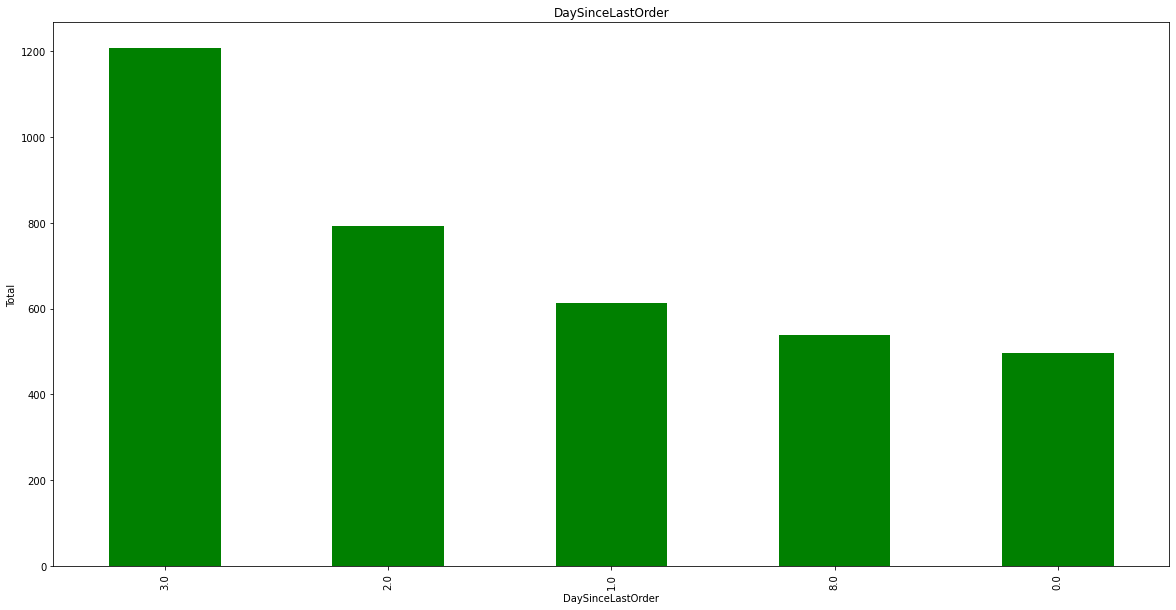

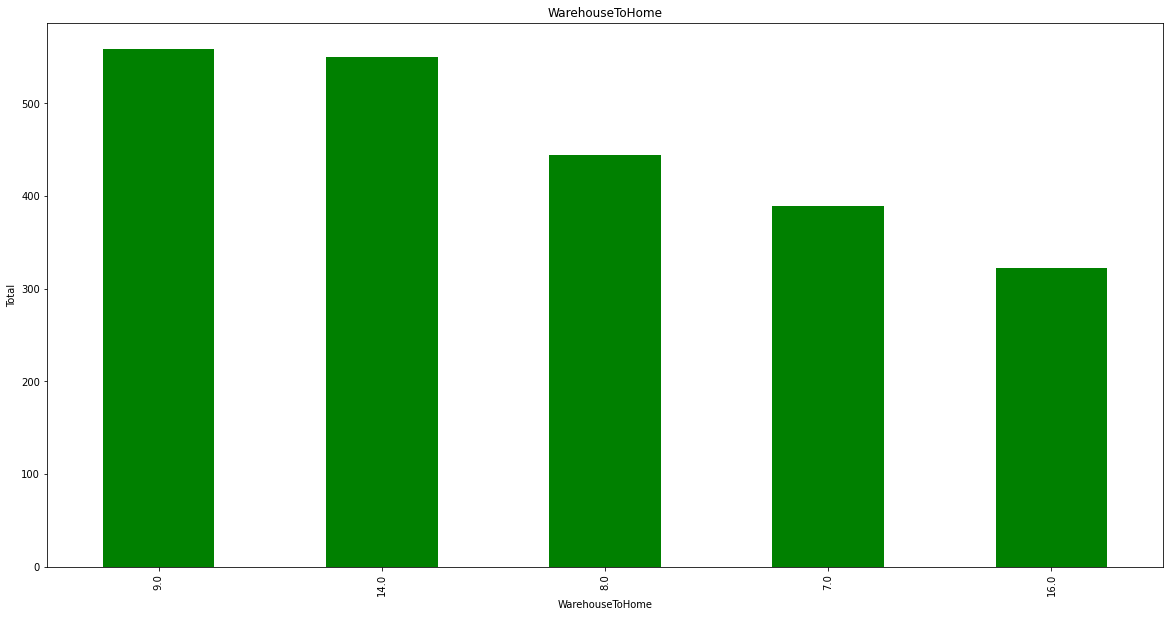

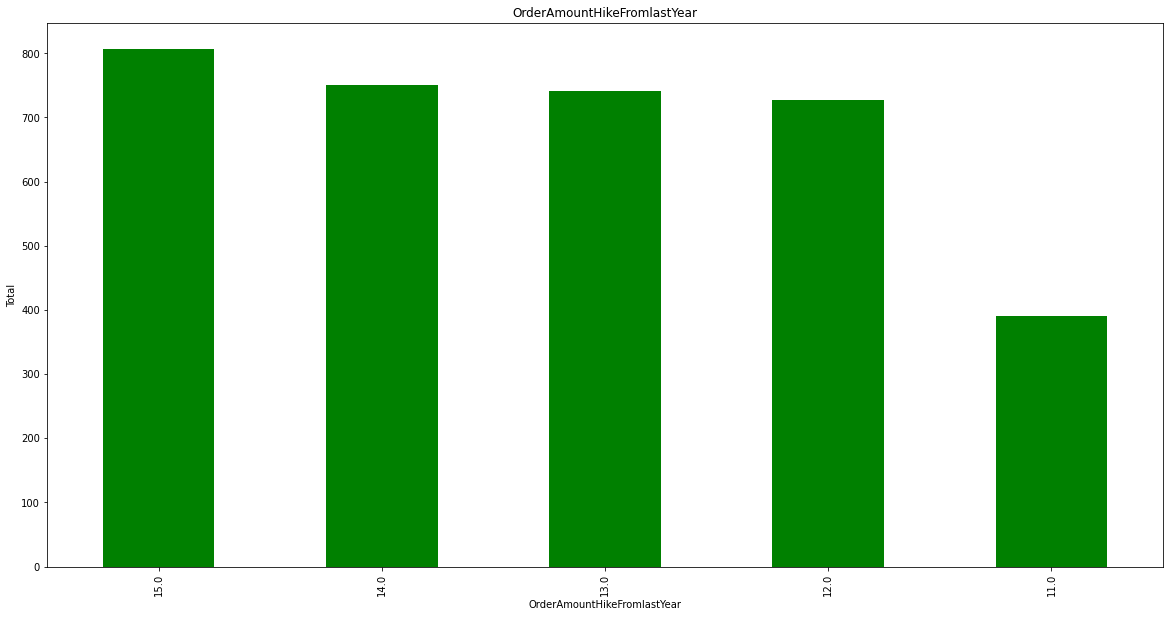

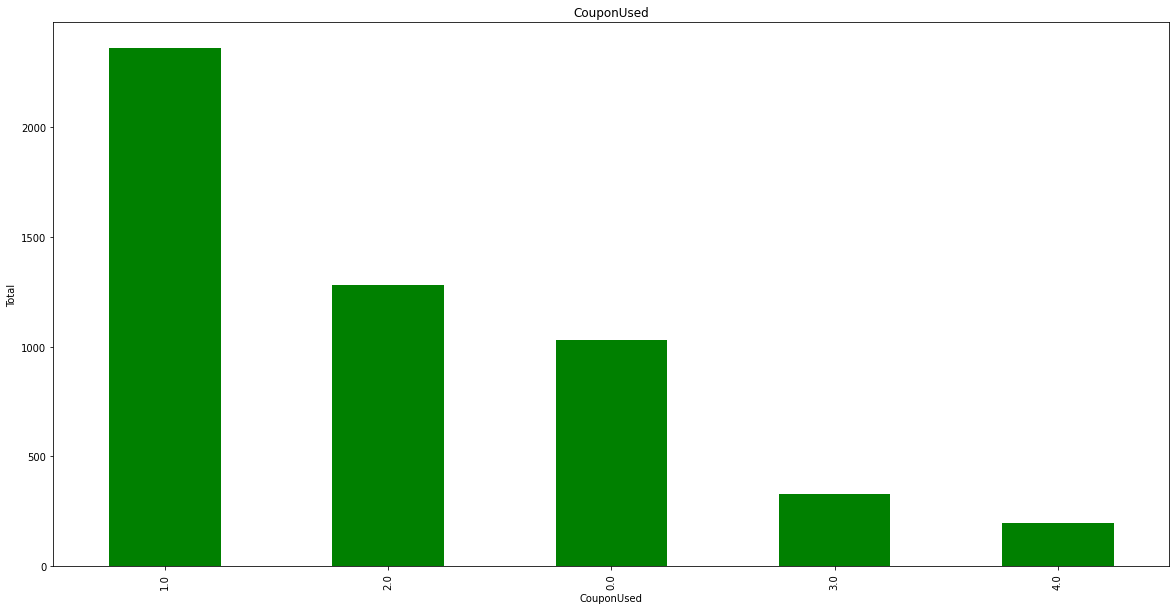

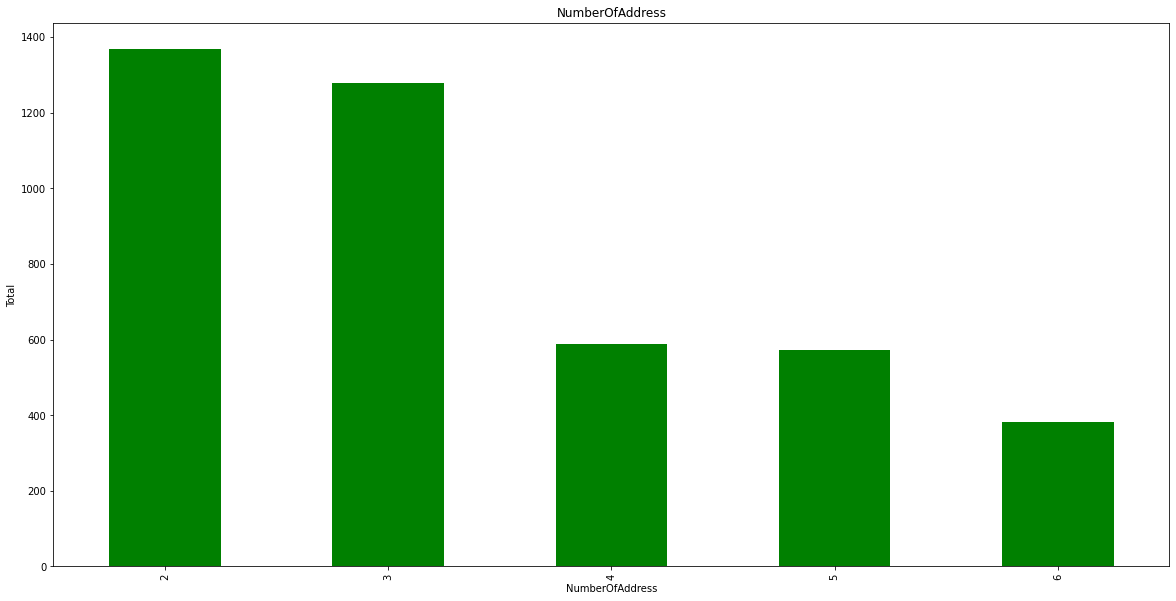

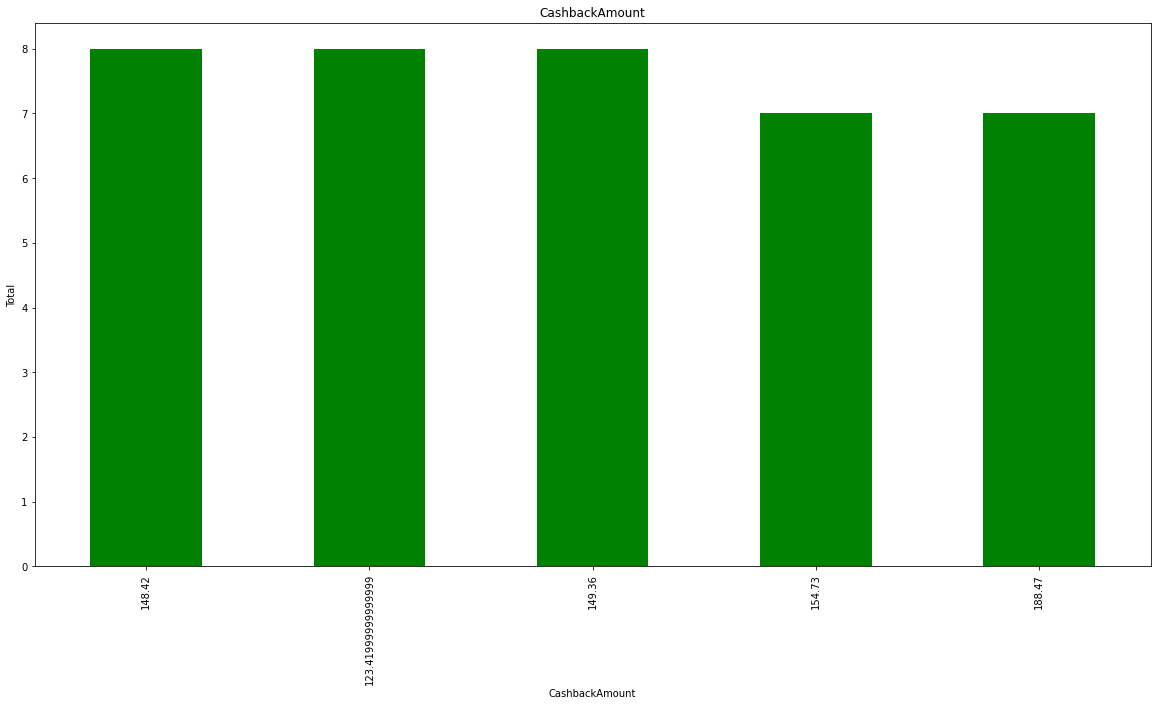

In [ ]:
# Bar graph on specific columns to check frequency

columns_1 = ['DaySinceLastOrder', 'WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','NumberOfAddress','CashbackAmount']
for i in columns_1:
  plt.figure(figsize = (20,10))
  churn_clean.groupby(i).size().sort_values(ascending = False).head().plot(kind='bar', color='green')
  plt.title(i)
  plt.ylabel('Total')
  plt.xlabel(i)
  plt.show()

From the bar graphs we can see that;



*   The most number of days that customers took since the last order was 3days.

*   A distance of 9 had the most number of customers from the warehouse to their home.


*   15% was the most frequency order hike from the previous year.
*   The most frequent number of coupons used in the last month was 1.


*   Most of the customers had 2 addresses.


*   The most frequent cashback amount in the last month was 148.42



In [ ]:
# Frequency tables on Tenure, PreferredLoginDevice,PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore,
# MaritalStatus, Complain, OrderCount

columns_2 = ['Tenure', 'PreferredLoginDevice',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'Complain', 'OrderCount' ]
for i in columns_2:
  print('Frequency table of', i)
  count = churn_clean[i].value_counts().head()
  print(count)
  print('**********************************************************')
  print('                                                          ')

Frequency table of Tenure
1.0    690
9.0    511
0.0    508
8.0    263
7.0    221
Name: Tenure, dtype: int64
**********************************************************
                                                          
Frequency table of PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
**********************************************************
                                                          
Frequency table of PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
**********************************************************
                                                          
Frequency table of Gender
Male      3384
Female    2246
Name: Gender, dtype: int64
**********************************************************
                                                          
Frequenc



1.   Most customers have a 1 year tenure with the organisation 
2.   Most preferred log in device is a mobile phone 
3.   Most preferred payment mode is a debit card 
4.   Most customer are male 
5.   Most customers spend 3 hours on the app 
6.   Most customers had 4 devices registered
7.   Most preferred order category for customers are mobile phones
8.   Most common satisfaction score given by customers is 3 
9.   Most customers are married 
10.  Most customers did not make complaints 
11.  Most number of orders has being placed in a month were 2



In [ ]:
# Checking the median, mode, variance, skewness and kurtosis of our dataframe

for i in column:
  print('The median of', i, 'is:')
  print(churn_clean[i].median())
  print('The mode of', i, 'is:')
  print(churn_clean[i].mode())
  print('The variance of', i, 'is:')
  print(churn_clean[i].var())
  print('The skewness of', i, 'is:')
  print(churn_clean[i].skew())
  print('The kurtosis of', i, 'is:')
  print(churn_clean[i].kurt())
  print('***************************************************************************')
  print('      ')


The median of Churn is:
0.0
The mode of Churn is:
0    0
dtype: int64
The variance of Churn is:
0.14005547900098592
The skewness of Churn is:
1.7728425768605385
The kurtosis of Churn is:
1.1433768490855836
***************************************************************************
      
The median of Tenure is:
9.0
The mode of Tenure is:
0    1.0
dtype: float64
The variance of Tenure is:
69.85534770301142
The skewness of Tenure is:
0.7732782369506156
The kurtosis of Tenure is:
0.15461343944830785
***************************************************************************
      
The median of CityTier is:
1.0
The mode of CityTier is:
0    1
dtype: int64
The variance of CityTier is:
0.8379375140219949
The skewness of CityTier is:
0.7353259435532102
The kurtosis of CityTier is:
-1.4015292942601079
***************************************************************************
      
The median of WarehouseToHome is:
14.0
The mode of WarehouseToHome is:
0    9.0
dtype: float64
The variance of

Skewness:

Hours spent on app is fairly symmetrical

Churn,Warehouse to home,Number of devices registered,Satisfaction score,Number of addresses,Coupon used,Order count,Day since last order and Cashback amount are highly skewed

Tenure, City tier,Complain and Amount hike from last year are moderately skewed


Kurtosis:

Warehouse to home, Coupon used,Order count and Day since last order have heavier tails








<Figure size 1000x300 with 0 Axes>

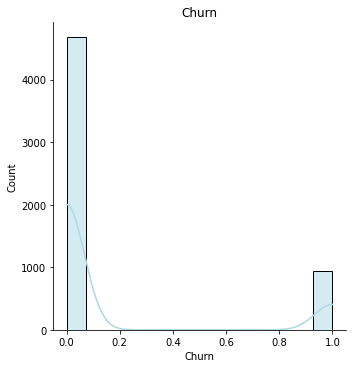

<Figure size 1000x300 with 0 Axes>

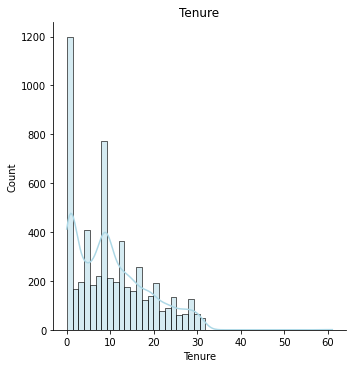

<Figure size 1000x300 with 0 Axes>

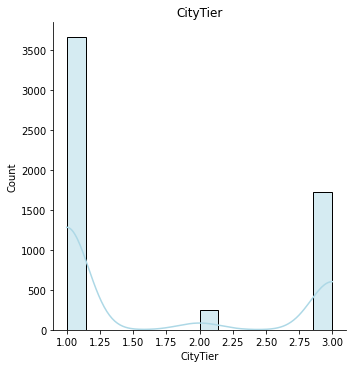

<Figure size 1000x300 with 0 Axes>

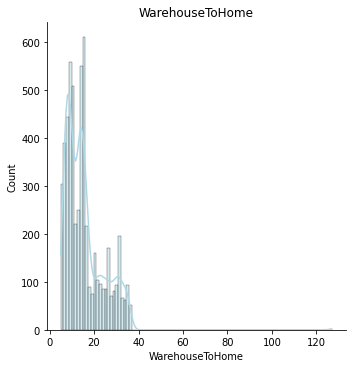

<Figure size 1000x300 with 0 Axes>

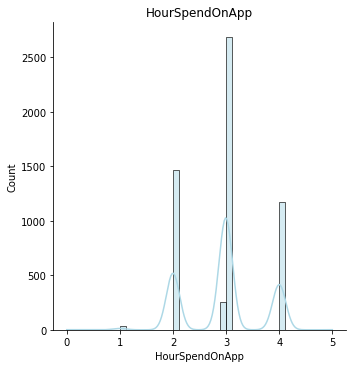

<Figure size 1000x300 with 0 Axes>

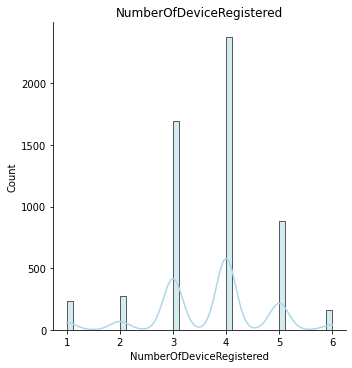

<Figure size 1000x300 with 0 Axes>

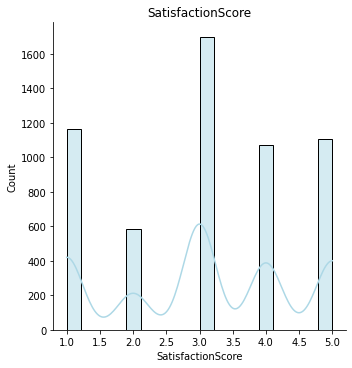

<Figure size 1000x300 with 0 Axes>

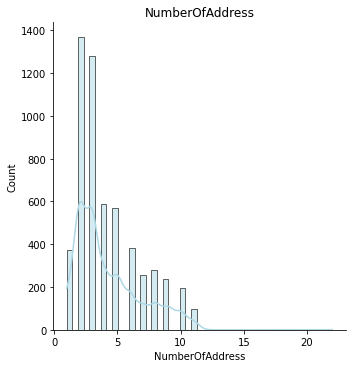

<Figure size 1000x300 with 0 Axes>

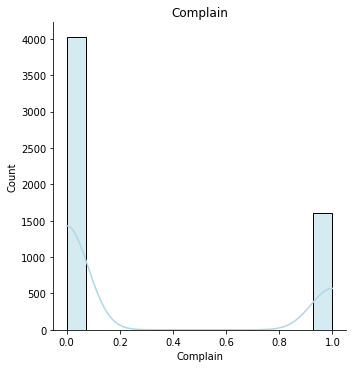

<Figure size 1000x300 with 0 Axes>

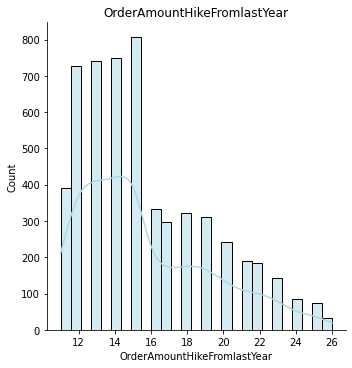

<Figure size 1000x300 with 0 Axes>

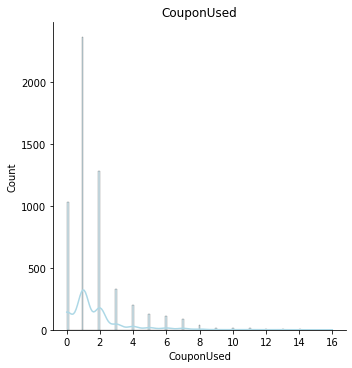

<Figure size 1000x300 with 0 Axes>

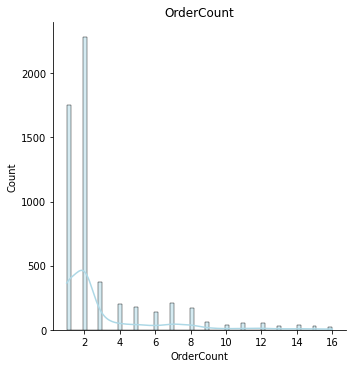

<Figure size 1000x300 with 0 Axes>

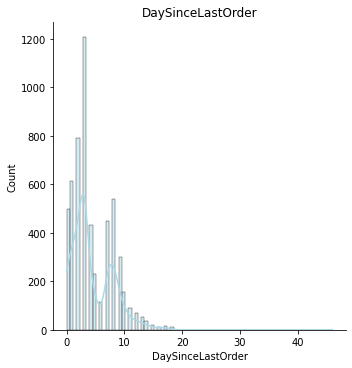

<Figure size 1000x300 with 0 Axes>

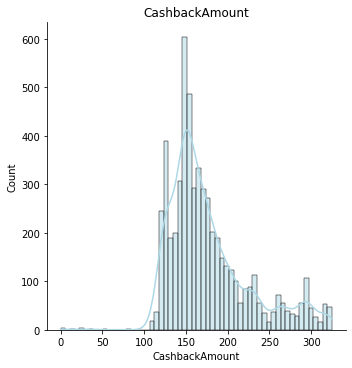

In [ ]:
# Histogram of our numerical variables
for i in column:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(churn[i], kde = True, color = 'lightblue')
  plt.title(i, color = 'Black')
  plt.show()

Most of our variables are skewed

## **Bivariate Analysis**

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: Gender, dtype: int64


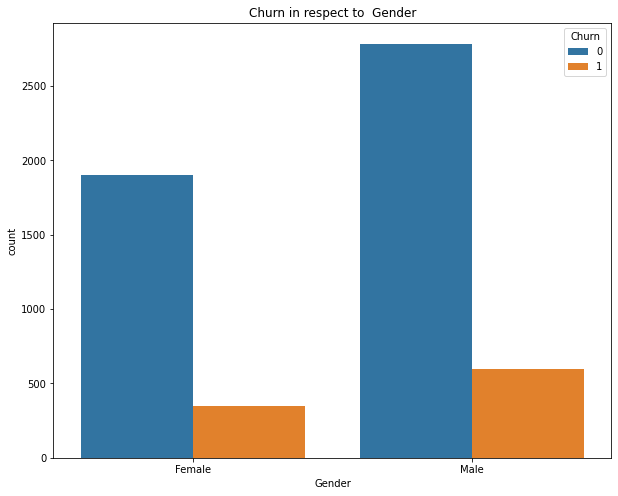

In [ ]:
# Checking churn against gender

import warnings
warnings.filterwarnings("ignore")

print(churn_clean.groupby('Churn').Gender.value_counts())

fig = plt.subplots(figsize = (10, 8))
sns.countplot('Gender', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to  Gender')
plt.show()

Churn  PreferredPaymentMode
0      Debit Card              1958
       Credit Card             1522
       E wallet                 474
       Cash on Delivery         386
       UPI                      342
1      Debit Card               356
       Credit Card              252
       E wallet                 140
       Cash on Delivery         128
       UPI                       72
Name: PreferredPaymentMode, dtype: int64


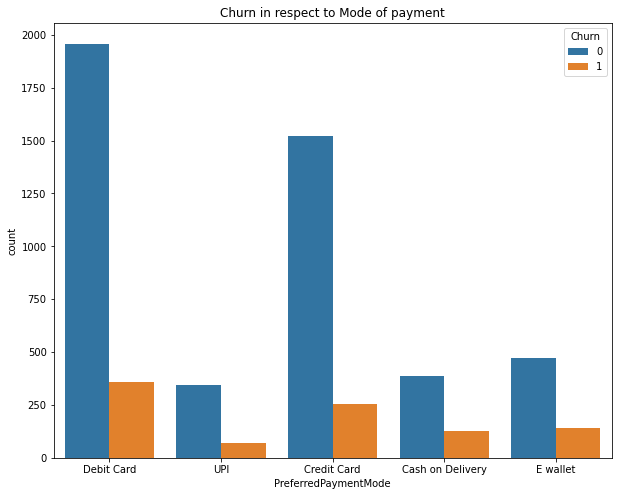

In [ ]:
# Checking churn against the preferred mode of payment

print(churn_clean.groupby('Churn').	PreferredPaymentMode.value_counts())

fig = plt.subplots(figsize = (10, 8))
sns.countplot('PreferredPaymentMode', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to Mode of payment')
plt.show()



Churn  Complain
0      0           3586
       1           1096
1      1            508
       0            440
Name: Complain, dtype: int64


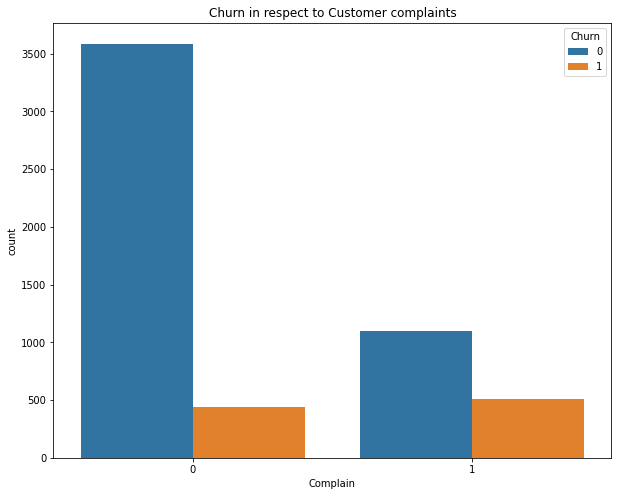

In [ ]:
# Checking churn against a customer making complaints

print(churn_clean.groupby('Churn').	Complain.value_counts())

fig = plt.subplots(figsize = (10, 8))
sns.countplot('Complain', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to Customer complaints')
plt.show()

Churn  PreferredLoginDevice
0      Mobile Phone            3372
       Computer                1310
1      Mobile Phone             624
       Computer                 324
Name: PreferredLoginDevice, dtype: int64


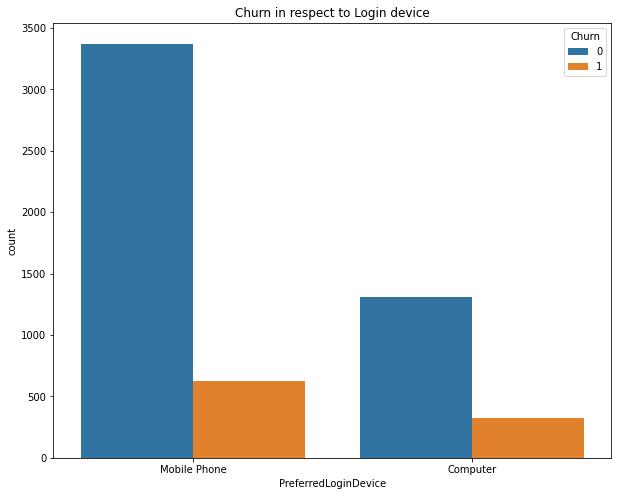

In [ ]:
# Checking churn against customers ability to have a login device

print(churn_clean.groupby('Churn').	PreferredLoginDevice.value_counts())

fig = plt.subplots(figsize = (10, 8))
sns.countplot('PreferredLoginDevice', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to Login device')
plt.show()

Churn  WarehouseToHome
0      9.0                479
       14.0               426
       8.0                386
       7.0                340
       16.0               268
                         ... 
1      27.0                12
       33.0                12
       34.0                10
       36.0                10
       5.0                  1
Name: WarehouseToHome, Length: 66, dtype: int64


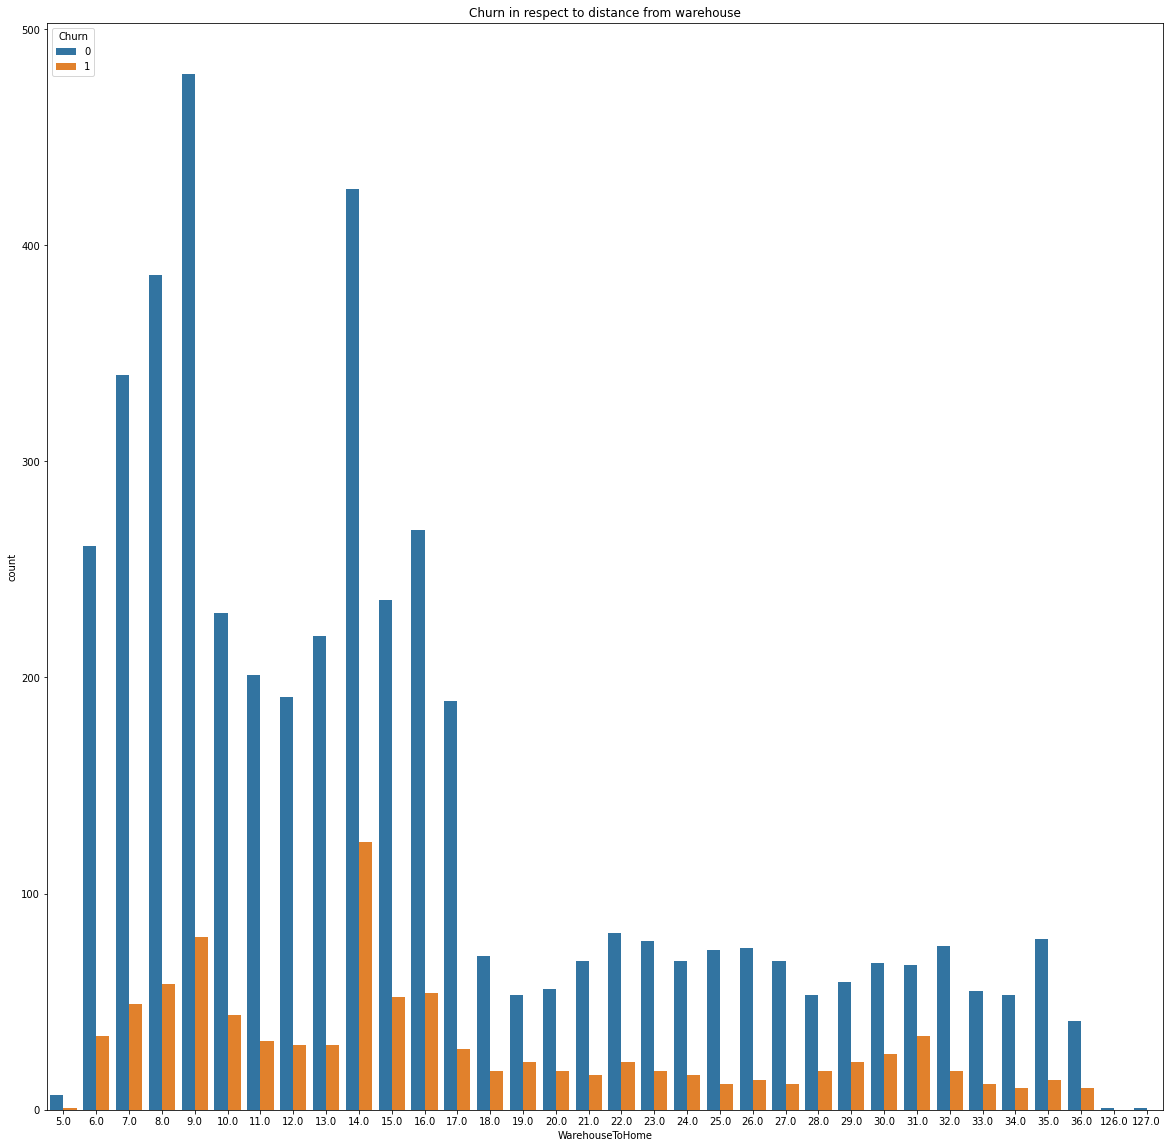

In [ ]:
# Checking churn against customers distance from warehouse

print(churn_clean.groupby('Churn').	WarehouseToHome.value_counts())

fig = plt.subplots(figsize = (20, 20))
sns.countplot('WarehouseToHome', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to distance from warehouse')
plt.show()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: MaritalStatus, dtype: int64


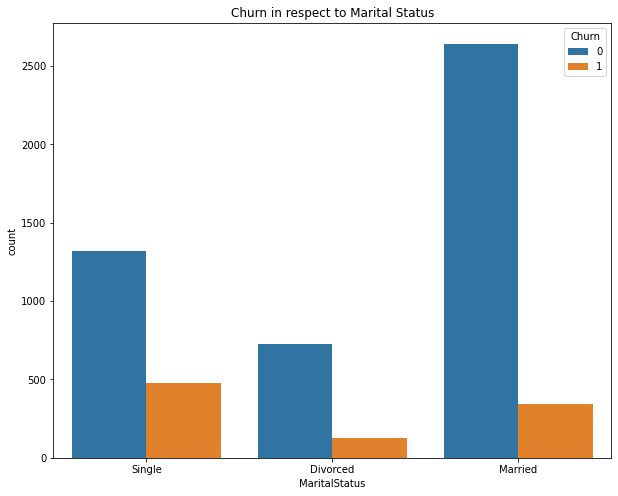

In [ ]:
# Checking churn against marital status of customers

print(churn_clean.groupby('Churn').	MaritalStatus.value_counts())

fig = plt.subplots(figsize = (10, 8))
sns.countplot('MaritalStatus', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to Marital Status')
plt.show()

Churn  NumberOfDeviceRegistered
0      4                           1985
       3                           1445
       5                            683
       2                            250
       1                            213
       6                            106
1      4                            392
       3                            254
       5                            198
       6                             56
       2                             26
       1                             22
Name: NumberOfDeviceRegistered, dtype: int64


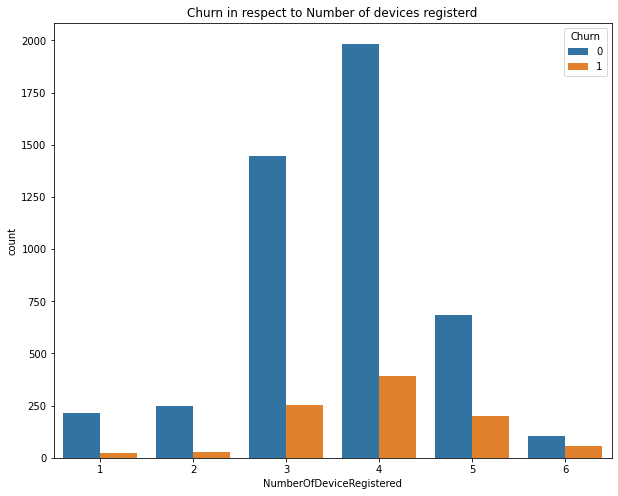

In [ ]:
# Checking churn against number of devices registered

print(churn_clean.groupby('Churn').NumberOfDeviceRegistered.value_counts())

fig = plt.subplots(figsize = (10, 8))
sns.countplot('NumberOfDeviceRegistered', hue = 'Churn', data = churn_clean)
plt.title('Churn in respect to Number of devices registerd')
plt.show()

Most customers who churned:



1.   were male
2.   used debit cards as their preferred mode of payment
3.   had made complaints
4.   used mobile phones as their preferred login device
5.   lived a distance of 14 from the warehouse 
6.   were single
7.   had 4 devices registered





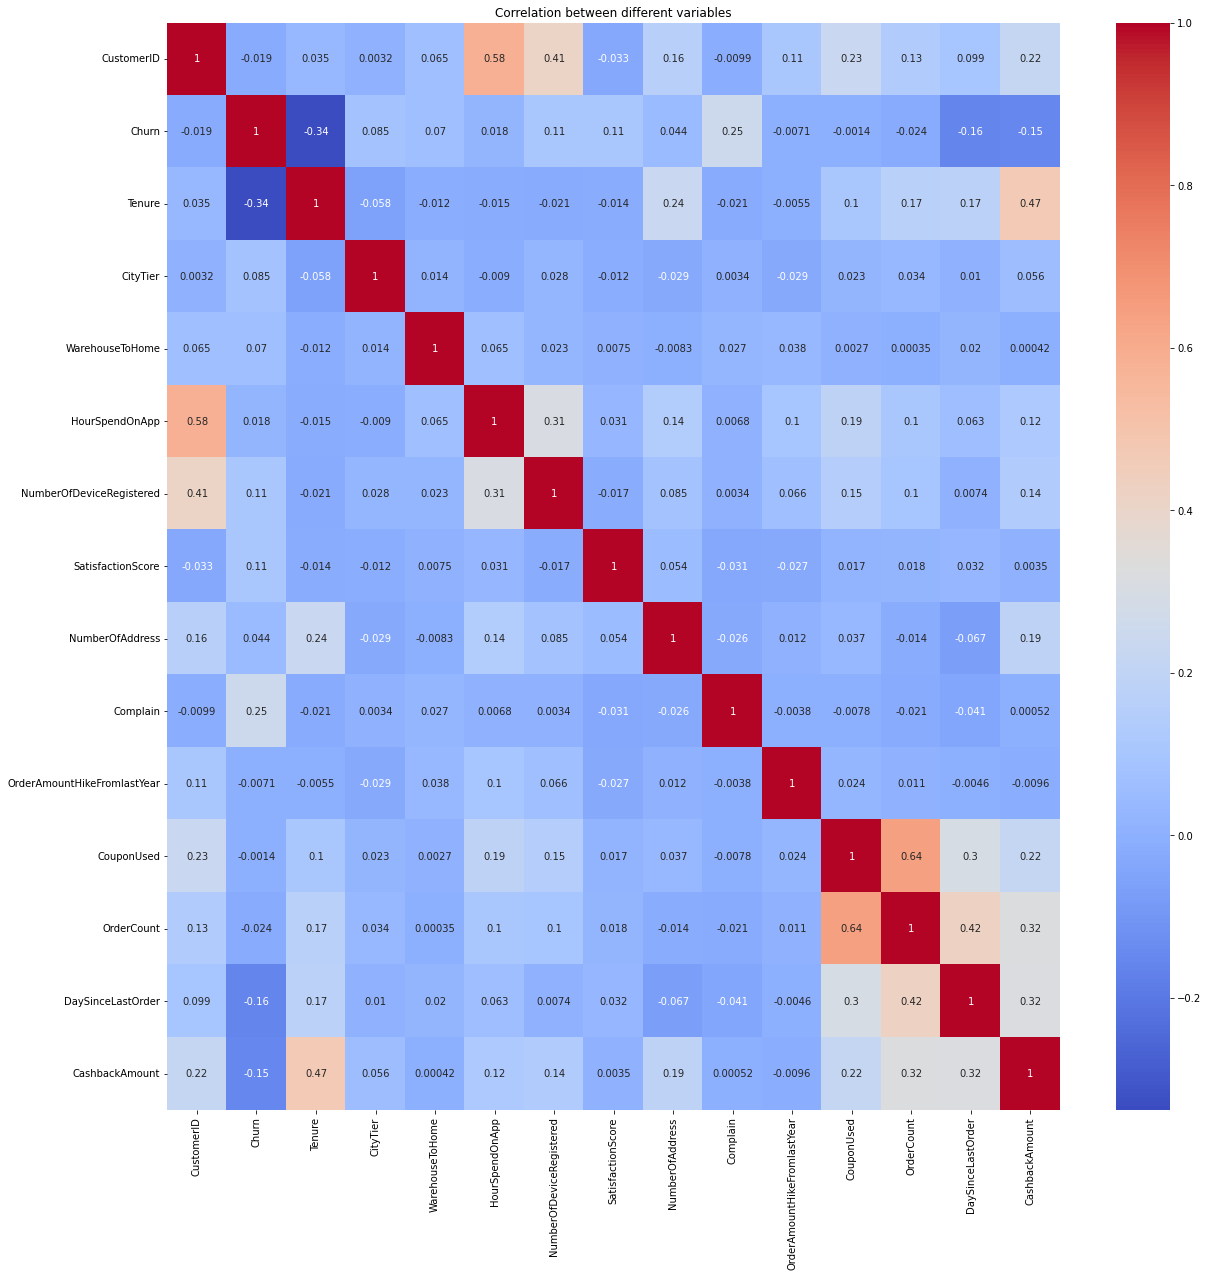

In [ ]:
# Plotting heatmap to asses correlation between our variables 

fig, heat = plt.subplots(figsize = (20,20))
heat = sns.heatmap(churn_clean.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between different variables')
plt.show()

Coupon used and order count have a positive moderate linear relationship

Order count and day since last order have a positive weak linear relationship 

Day since last order and cashback amount have a positive weak linear relationship 

Tenure and cashback amount have a positive weak linear relationship 



<Figure size 700x500 with 0 Axes>

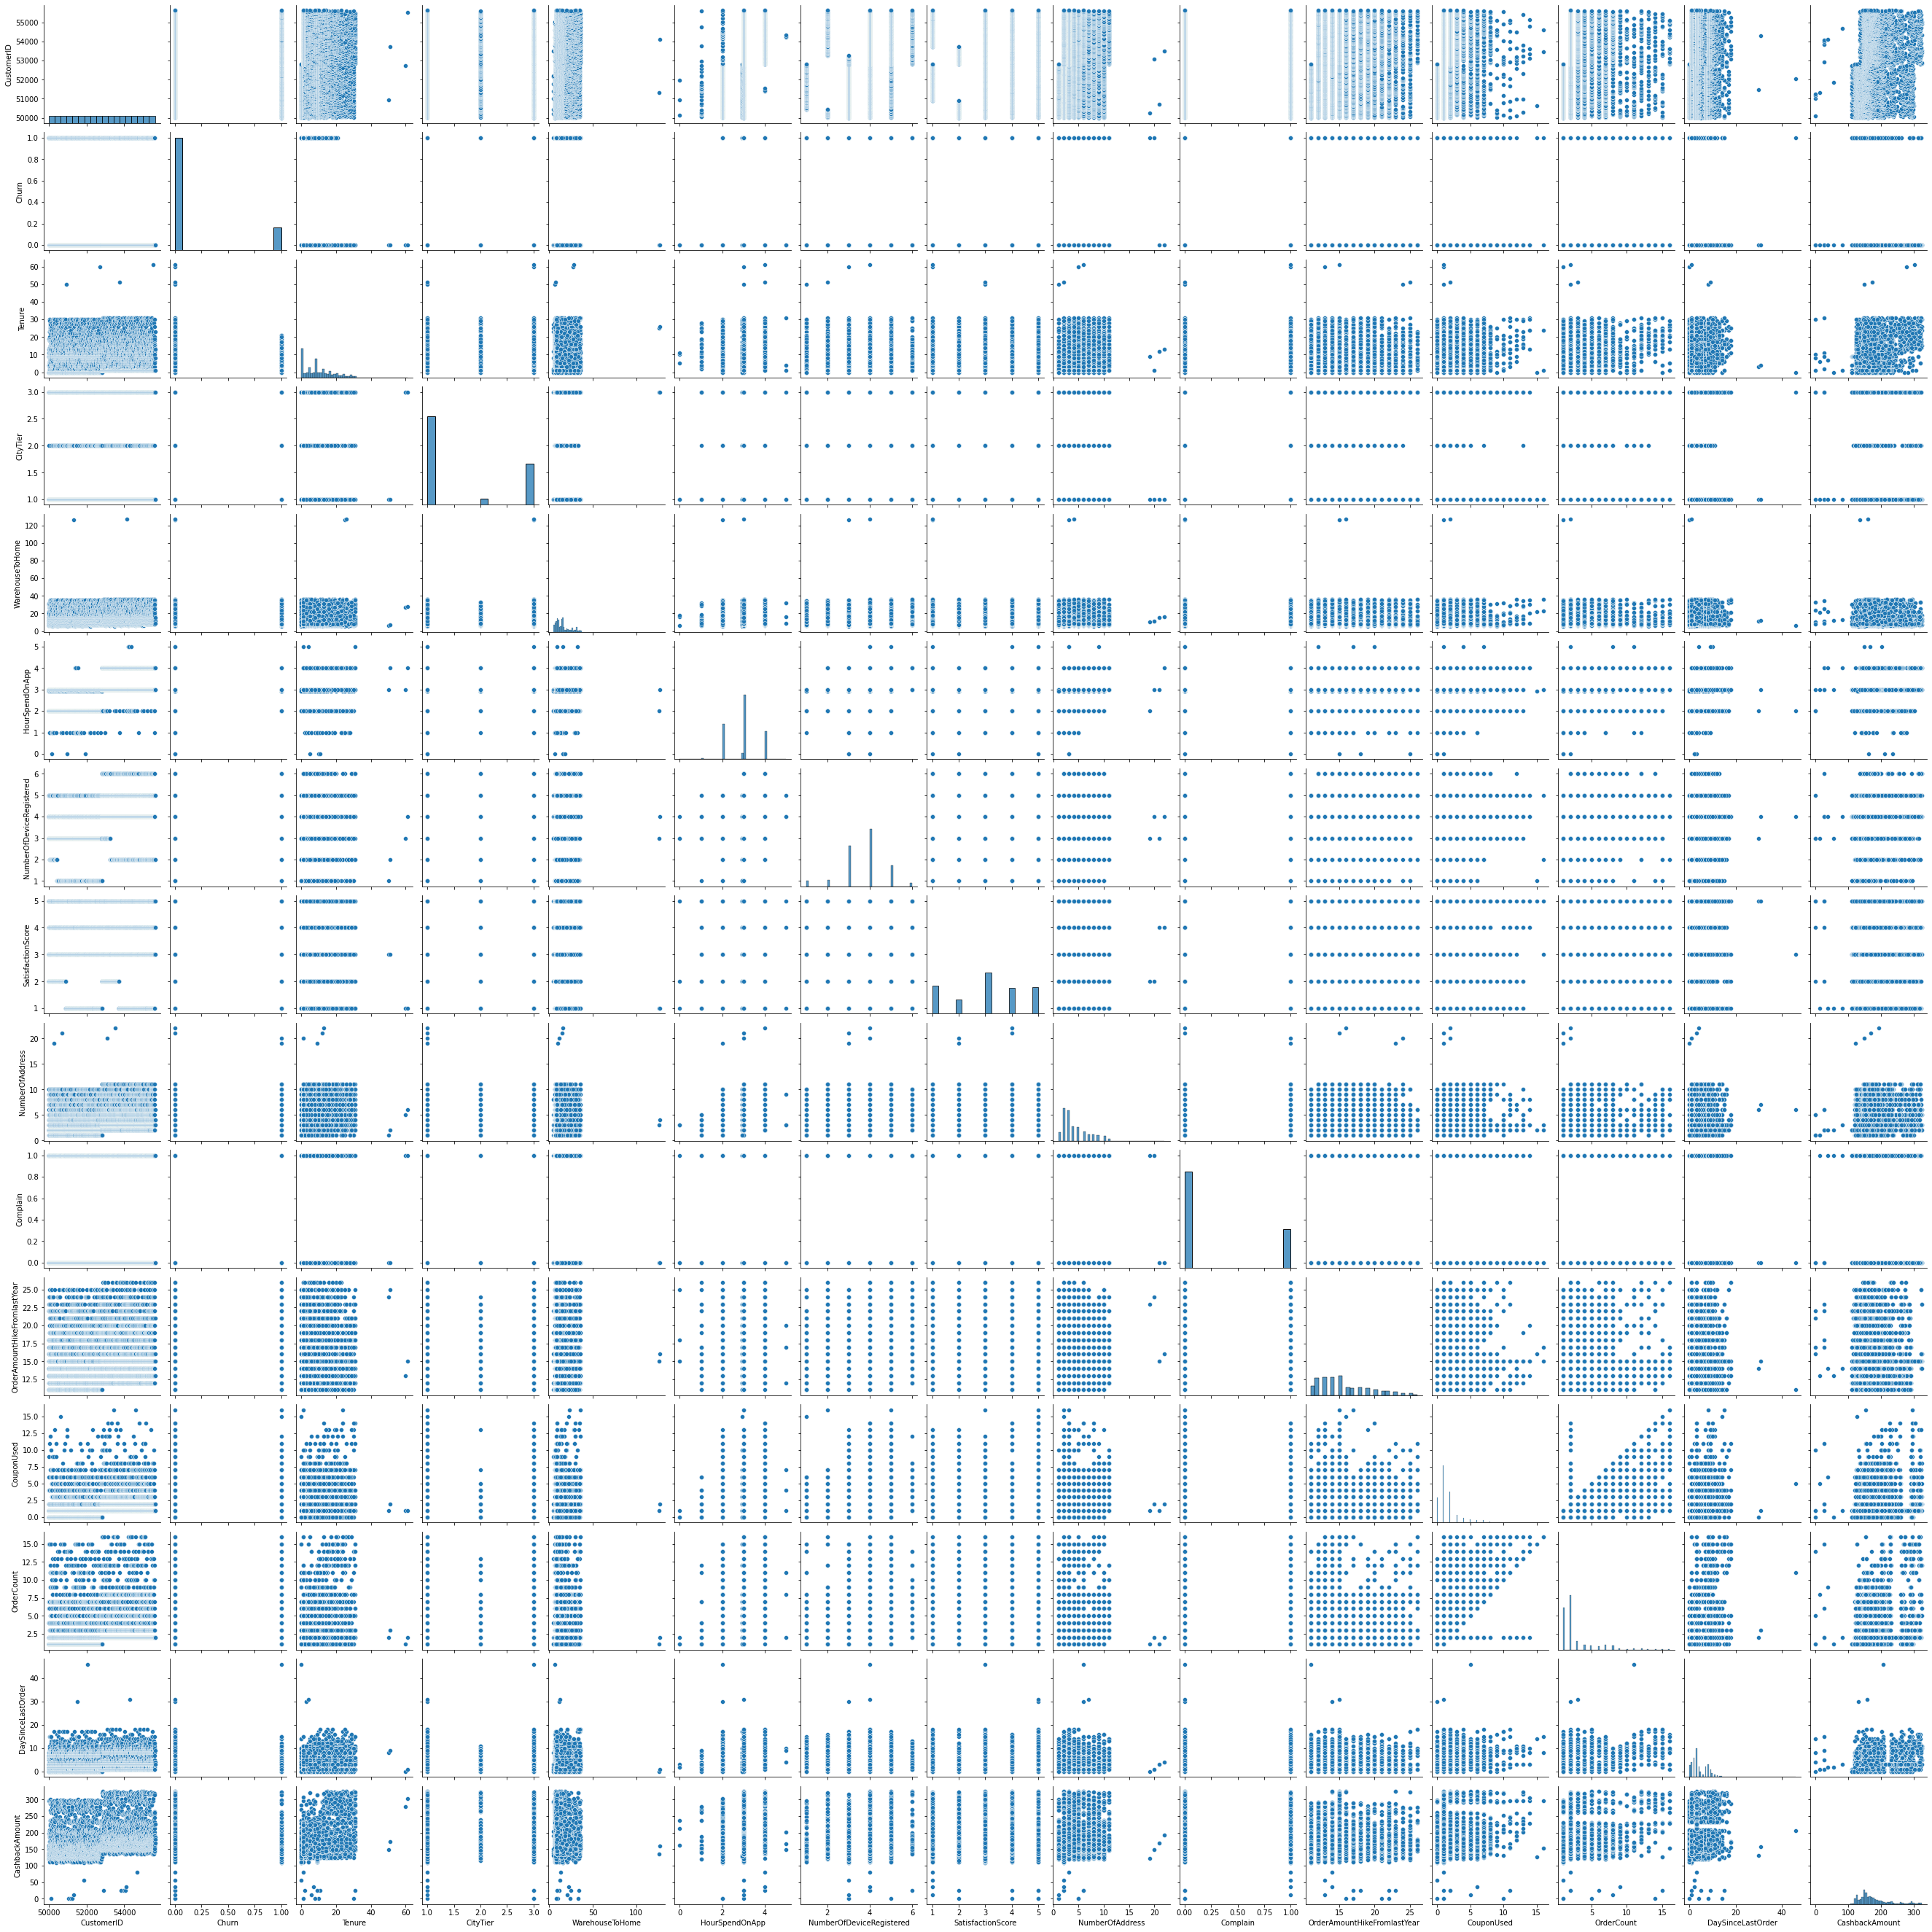

In [ ]:
# Plotting a pairplot 
# A visualization that also asses the correlation between our variables 
plt.figure(figsize = (7, 5), dpi=100)
sns.pairplot(churn_clean)
plt.show()

## **Multivariate Analysis**

In [ ]:
# Perform label encoding on binary class categorical variables
categ = ['PreferredLoginDevice','Gender']
final = churn_clean
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
final[categ] = final[categ].apply(le.fit_transform)

In [ ]:
# One hot encodeng on our multiclass categorical variables 
final_df = pd.get_dummies(
    data= final ,
    columns=["PreferredPaymentMode", "PreferedOrderCat","MaritalStatus"],
    prefix=["p", "o","m"])

In [ ]:
# Confirm changes made on our dataframe
final_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,...,p_E wallet,p_UPI,o_Fashion,o_Grocery,o_Laptop & Accessory,o_Mobile Phone,o_Others,m_Divorced,m_Married,m_Single
0,50001,1,4.0,1,3,6.0,0,3.000000,3,2,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,1,1,8.0,1,3.000000,4,3,...,0,1,0,0,0,1,0,0,0,1
2,50003,1,9.0,1,1,30.0,1,2.000000,4,3,...,0,0,0,0,0,1,0,0,0,1
3,50004,1,0.0,1,3,15.0,1,2.000000,4,5,...,0,0,0,0,1,0,0,0,0,1
4,50005,1,0.0,1,1,12.0,1,2.931535,3,5,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Dividing our dataframe into features and corresponding labels

feat = final_df.drop(['Churn', 'CustomerID'], 1)
group_label= final_df['Churn']

feat.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,p_E wallet,p_UPI,o_Fashion,o_Grocery,o_Laptop & Accessory,o_Mobile Phone,o_Others,m_Divorced,m_Married,m_Single
0,4.0,1,3,6.0,0,3.000000,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,9.0,1,1,8.0,1,3.000000,4,3,7,1,...,0,1,0,0,0,1,0,0,0,1
2,9.0,1,1,30.0,1,2.000000,4,3,6,1,...,0,0,0,0,0,1,0,0,0,1
3,0.0,1,3,15.0,1,2.000000,4,5,8,0,...,0,0,0,0,1,0,0,0,0,1
4,0.0,1,1,12.0,1,2.931535,3,5,3,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it
final_df.to_csv('EncodedE Commerce.csv')

In [ ]:
# Subject our features to LDA
# Import LDA method from sklearn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of lda
lda = LDA()

lda_ = lda.fit(feat, group_label)
lda_feat = lda_.transform(feat)

# Display the coefficient of the reduced columns
lda_.coef_

array([[-0.14915169, -0.37828037,  0.34341321,  0.03308093,  0.26454208,
        -0.10138183,  0.36665146,  0.28375528,  0.21355089,  2.04816937,
        -0.00488235,  0.0280691 ,  0.08675199, -0.08437148, -0.01422414,
         0.66576029, -0.29553368, -0.08119236,  0.42310932, -0.18626836,
         0.30902785,  1.42549231, -1.07854528,  0.00776155,  2.45526686,
        -0.23662995, -0.44110745,  0.65490161]])

In [ ]:
# Since coefficient are in an array, we need to create a df so that we can retrieve name of columns

f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
o_Others,2.455267
Complain,2.048169
o_Grocery,1.425492
p_Cash on Delivery,0.665760
m_Single,0.654902
p_E wallet,0.423109
NumberOfDeviceRegistered,0.366651
CityTier,0.343413
o_Fashion,0.309028
SatisfactionScore,0.283755


The positive values can be interpreted as when other independent variables are held constant and an increase in the independent variable of interest would mean that the discriminant function score for a case is predicted to increase.

# **Modelling**

In [ ]:
# Performing oversampling to deal with our class imbalance 
# This is because undersampling requires a large number of records which we don't have in our case

# Let's start by seeing the shape of our classes
churn = final_df[final_df['Churn']==1]
not_churn = final_df[final_df['Churn']==0]

print(churn.shape,not_churn.shape)

(948, 30) (4682, 30)


In [ ]:
# Splitting our dataset into dependent and independent variables

X = final_df.drop(['Churn', 'CustomerID'], axis=1).values
y= final_df['Churn'].values


In [ ]:
# Performing oversampling
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy=0.5)
X_res, y_res = os.fit_resample(X,y)

In [ ]:
# The new shape of our X and y variables
print(X_res.shape,y_res.shape)

(7023, 28) (7023,)


## ***Random Forest***

In [ ]:
# Train using 80% of the data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Building the model

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_forest.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,1405.000000,1405.00000
mean,0.328826,0.33452
std,0.469954,0.47199
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,1.00000
max,1.000000,1.00000


In [ ]:
# Predict based on the model we've trained
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_pred = forest.predict(X_test)
print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))

print("The accuracy of  random forest classifier is: ", accuracy_score(y_test,y_pred)*100)

Confussion Matrix : 
 [[931  12]
 [  4 458]]
The accuracy of  random forest classifier is:  98.86120996441281


In [ ]:
# Classification report for our random forest report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       943
           1       0.97      0.99      0.98       462

    accuracy                           0.99      1405
   macro avg       0.99      0.99      0.99      1405
weighted avg       0.99      0.99      0.99      1405



In [ ]:
# Evaluate the train dataset to check for overfitting 
y_pred_forest = forest.predict(X_train)
print("Confussion Matrix : \n", confusion_matrix(y_train, y_pred_forest))

print("The accuracy of  random forest classifier is: ", accuracy_score(y_train,y_pred_forest)*100)

Confussion Matrix : 
 [[3739    0]
 [   0 1879]]
The accuracy of  random forest classifier is:  100.0


Our Base random forest model has an accuracy score of 98.86% with 1,389 correct predictions and 16 incorrect predictions. The model also scored 99% in terms of F1 score



In [ ]:
# Choosing our best parameters using Randomised search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

search = RandomizedSearchCV(estimator= forest, param_distributions={'n_estimators': sp_randint(100,1000), 'min_samples_split': np.arange(2,20), 'max_depth': sp_randint(2,10)},
                      n_jobs=1, cv = 5)

search.fit(X_train, y_train)
search.best_params_

{'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 642}

In [ ]:
# Fit model with the best parameters

forest_tune = RandomForestClassifier(max_depth=9, min_samples_split=3, n_estimators=642, random_state=42)
forest_tune.fit(X_train, y_train)
y_pred_tune = forest.predict(X_test)

print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred_tune))
print('accuracy = ', accuracy_score(y_test, y_pred_tune)* 100)

Confussion Matrix : 
 [[931  12]
 [  4 458]]
accuracy =  98.86120996441281


In [ ]:
# Classification report for our random forest report after applying the optimal parameters 

print(classification_report(y_test,y_pred_tune))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       943
           1       0.97      0.99      0.98       462

    accuracy                           0.99      1405
   macro avg       0.99      0.99      0.99      1405
weighted avg       0.99      0.99      0.99      1405



After tuning the model performed performance did not change

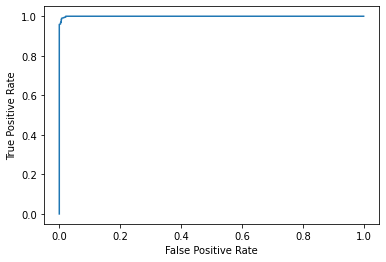

In [ ]:
# Plot a ROC curve
# Define metrics
from sklearn import metrics
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

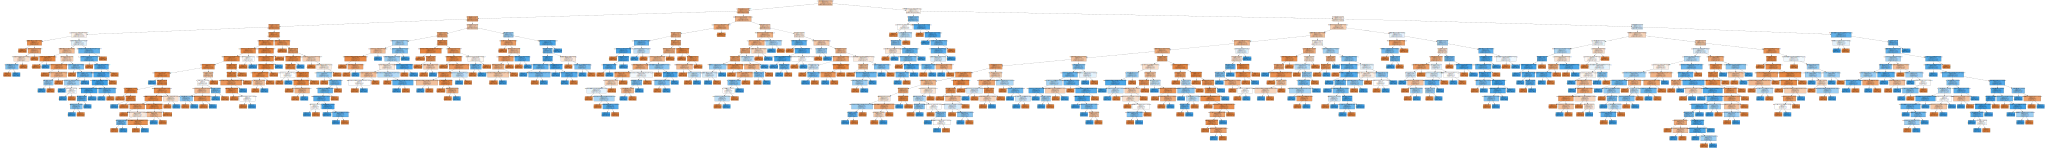

In [ ]:
# Plot a decision tree from our random forest
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(forest.estimators_[1],filled = True, feature_names = final_df.drop(['Churn', 'CustomerID'], axis=1).columns )
graphviz.Source(dot_data, format = 'png')

### Random Forest with selected features

In [ ]:
# Define feature importance
forest.feature_importances_

array([0.24430435, 0.01710174, 0.02528754, 0.0673659 , 0.01727296,
       0.01748029, 0.03032196, 0.04653357, 0.05652208, 0.06863411,
       0.04923081, 0.02304909, 0.02867723, 0.05823808, 0.09065619,
       0.01107882, 0.01381697, 0.01186158, 0.00943525, 0.00592444,
       0.00843642, 0.0039111 , 0.01425889, 0.03025115, 0.00268811,
       0.00546831, 0.01818327, 0.0240098 ])

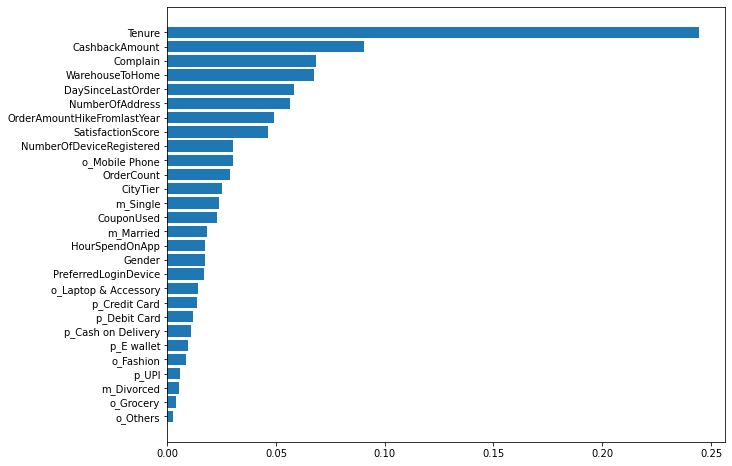

In [ ]:
# Feature importance chart
fig = plt.subplots(figsize = (10, 8))
sorted_idx = forest.feature_importances_.argsort()
plt.barh(final_df.drop(['Churn', 'CustomerID'], axis=1).columns[sorted_idx],forest.feature_importances_[sorted_idx])
plt.show()

Tenure has the most influence on whether a customer churns or not

In [ ]:
# Create a model with select features
# splitting data 
X_f = final_df[['Tenure','CashbackAmount','WarehouseToHome','Complain','DaySinceLastOrder','NumberOfAddress','SatisfactionScore','OrderAmountHikeFromlastYear']]
y_f = final_df['Churn']

# Performing oversampling
os = RandomOverSampler(sampling_strategy=0.5)
X_res_f, y_res_f = os.fit_resample(X_f,y_f)
# Train using 80% of the data.
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_res_f, y_res_f, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_f_train)

X_f_train = scaler.transform(X_f_train)
X_f_test = scaler.transform(X_f_test)

In [ ]:
# Building the model
forest_f = RandomForestClassifier()
forest_f = forest_f.fit(X_f_train, y_f_train)

In [ ]:
# Predict based on the model we've trained
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_pred_f = forest_f.predict(X_f_test)
print("Confussion Matrix : \n", confusion_matrix(y_f_test, y_pred_f))

print("The accuracy of  random forest classifier is: ", accuracy_score(y_f_test,y_pred_f)*100)

Confussion Matrix : 
 [[937   6]
 [  0 462]]
The accuracy of  random forest classifier is:  99.5729537366548


Our model after feature importance has an accuracy score of 99.58% with 1,399 correct predictions and 6 incorrect predictions.

In [ ]:
# Evaluate the train dataset to check for overfitting 
y_forest = forest_f.predict(X_f_train)
print("Confussion Matrix : \n", confusion_matrix(y_f_train, y_forest))

print("The accuracy of  random forest classifier is: ", accuracy_score(y_f_train, y_forest)*100)

Confussion Matrix : 
 [[3739    0]
 [   0 1879]]
The accuracy of  random forest classifier is:  100.0


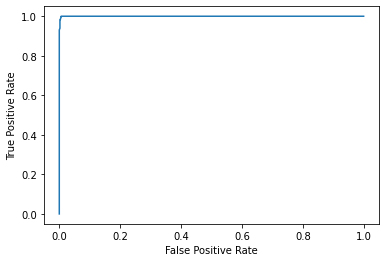

In [ ]:
# Plot the ROC curve
y_pred_proba_f = forest_f.predict_proba(X_f_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_f_test,  y_pred_proba_f)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

## ***Gradient Boost***

In [ ]:
# Let's start with Gradient boosted classifier
# We use decision trees when performing gradient boosting 
# We will start by setting different learning rates and comparing the performance of the classifier 
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=646, learning_rate=learning_rate, max_features=2, max_depth=7, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb_clf.score(X_train, y_train))
    print("Accuracy score (validation):", gb_clf.score(X_test, y_test))
    print("                                                                                    ")
    print("*********************************************************************************")

Learning rate:  0.05
Accuracy score (training): 1.0
Accuracy score (validation): 0.9886120996441281
                                                                                    
*********************************************************************************
Learning rate:  0.075
Accuracy score (training): 1.0
Accuracy score (validation): 0.9914590747330961
                                                                                    
*********************************************************************************
Learning rate:  0.1
Accuracy score (training): 1.0
Accuracy score (validation): 0.9928825622775801
                                                                                    
*********************************************************************************
Learning rate:  0.25
Accuracy score (training): 1.0
Accuracy score (validation): 0.9921708185053381
                                                                                    
**************

> We choose the learning rate of 0.75

In [ ]:
# Fit the model with our new hyperparameter
gb_clf2 = GradientBoostingClassifier(learning_rate=0.75, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions) * 100)
print("Confussion Matrix : \n", confusion_matrix(y_test, predictions))

Accuracy: 97.15302491103202
Confussion Matrix : 
 [[912  31]
 [  9 453]]


In [ ]:
# Classification report for our gradient boost model

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       943
           1       0.94      0.98      0.96       462

    accuracy                           0.97      1405
   macro avg       0.96      0.97      0.97      1405
weighted avg       0.97      0.97      0.97      1405



Our base gradient boost model has an accuracy score of 97.15% with 1365 correct predictions and 40 incorrect predictions. The model also has an F1 score of 97%

In [ ]:
# Perform Hyperparameter Tuning of our gradient boost model
# We will use Grid Search CV
# Start by importing the Grid Search CV
from sklearn.model_selection import GridSearchCV
# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
gb_cv = GridSearchCV(estimator = gb , param_grid = parameters , cv = 5, scoring = 'accuracy')
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
print(gb_cv.best_score_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
0.9884297271860136


In [ ]:
# Let's setup the hyperparameters to our model
gb_tune = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, n_estimators =500)
# Train our model on our training set
gb_tune.fit(X_train, y_train)
# # Predict based on our test data
predict = gb_tune.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, predict)* 100)
print("Confussion Matrix : \n", confusion_matrix(y_test, predict))

Accuracy: 99.28825622775801
Confussion Matrix : 
 [[935   8]
 [  2 460]]


In [ ]:
# Classification report for our gradient boost model after applying our hyperparameters

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       943
           1       0.98      1.00      0.99       462

    accuracy                           0.99      1405
   macro avg       0.99      0.99      0.99      1405
weighted avg       0.99      0.99      0.99      1405



In [ ]:
# Evaluate the train dataset to check for overfitting 
predict_y = gb_tune.predict(X_train)
print("Confussion Matrix : \n", confusion_matrix(y_train, predict_y))

print("The accuracy of our model: ", accuracy_score(y_train, predict_y)*100)

Confussion Matrix : 
 [[3739    0]
 [   0 1879]]
The accuracy of our model:  100.0


After tuning our hyperparameters our model performed at an accuracy score of
99.29% with 1,395 correct predictions and 10 incorrect predictions. The model also scored 99% in terms of F1 score


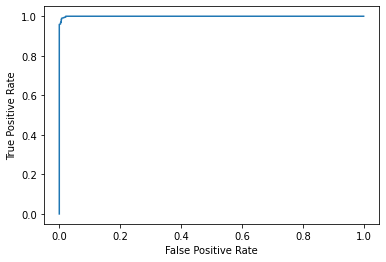

In [ ]:
# Plot ROC Curve
# define metrics
from sklearn import metrics
y_pred_proba1 = gb_tune.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

## ***Support Vector Machine***

In [ ]:
# Importing the library we need
from sklearn.svm import SVC

# Specify the input for the model
X_svc = final_df.drop(['Churn', 'CustomerID'], axis=1).values
y_svc = final_df['Churn'].values

# Perform oversampling
os = RandomOverSampler(sampling_strategy=0.5)
X_res_svc, y_res_svc = os.fit_resample(X_svc,y_svc)

# Split our data into train and test 
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X_res_svc, y_res_svc, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sv)

X_train_sv = scaler.transform(X_train_sv)
X_test_sv = scaler.transform(X_test_sv)

# We will start with linear kernel
# Fit the model
model_svcl = SVC(kernel= 'linear')
model_svcl.fit(X_train_sv,y_train_sv)
# Making prediction using test data
svc_pred = model_svcl.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, svc_pred)* 100)
print("Confusion Matrix : \n", confusion_matrix(y_test_sv, svc_pred))
# Classification report
print(classification_report(y_test_sv,svc_pred))

Accuracy: 83.06049822064057
Confusion Matrix : 
 [[838 105]
 [133 329]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       943
           1       0.76      0.71      0.73       462

    accuracy                           0.83      1405
   macro avg       0.81      0.80      0.81      1405
weighted avg       0.83      0.83      0.83      1405



Our SVM (Linear) model has an accuracy score of 83.06% with 1,167 correct predictions and 238 incorrect predictions

In [ ]:
# We move on to polynomial kernel
# Fit the model
model_svcp = SVC(kernel= 'poly')
model_svcp.fit(X_train_sv,y_train_sv)
# Making prediction using test data
svc_pred_poly = model_svcp.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, svc_pred_poly)* 100)
print("Confusion Matrix : \n", confusion_matrix(y_test_sv, svc_pred_poly))
# Classification report
print(classification_report(y_test_sv,svc_pred_poly))

Accuracy: 91.81494661921708
Confusion Matrix : 
 [[888  55]
 [ 60 402]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       943
           1       0.88      0.87      0.87       462

    accuracy                           0.92      1405
   macro avg       0.91      0.91      0.91      1405
weighted avg       0.92      0.92      0.92      1405



Our SVM (Polynomial) model has an accuracy score of 91.81% with 1,290 correct predictions and 115 incorrect predictions

In [ ]:
# We will also use rbf kernel
# Fit the model
model_svcr = SVC(kernel= 'rbf')
model_svcr.fit(X_train_sv,y_train_sv)
# Making prediction using test data
svc_pred_rbf = model_svcr.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, svc_pred_rbf)* 100)
print("Confusion Matrix : \n", confusion_matrix(y_test_sv, svc_pred_rbf))
# Classification report
print(classification_report(y_test_sv,svc_pred_rbf))

Accuracy: 91.24555160142349
Confusion Matrix : 
 [[882  61]
 [ 62 400]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       943
           1       0.87      0.87      0.87       462

    accuracy                           0.91      1405
   macro avg       0.90      0.90      0.90      1405
weighted avg       0.91      0.91      0.91      1405



Our SVM (rbf) model has an accuracy score of 91.24% with 1,282 correct predictions and 123 incorrect predictions

> Poly kernel performed the best compared to linear and rbf kernels

In [ ]:
# We will move forward with performing hyperparameter tuning on the polynomial kernel
parameters_grid = {
    "C":[0.001, 0.10, 0.1, 1 ,10, 25, 50 ,100],
    "gamma":[1, 0.1, 0.01, 0.001],
}
grid_svm = GridSearchCV(model_svcp, parameters_grid, cv=10, scoring = 'accuracy')
grid_svm.fit(X_train_sv,y_train_sv)
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'C': 0.001, 'gamma': 1}
0.9793524527248622


In [ ]:
# Apply our hyperparameters
# Fit the model
model_tune = SVC(kernel= 'poly', C = 0.001, gamma = 1,probability=True)
model_tune.fit(X_train_sv,y_train_sv)
# Making prediction using test data
pred_poly = model_tune.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, pred_poly)* 100)
print("Confusion Matrix : \n", confusion_matrix(y_test_sv, pred_poly))
# Classification report
print(classification_report(y_test_sv, pred_poly))

Accuracy: 98.36298932384342
Confusion Matrix : 
 [[922  21]
 [  2 460]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       943
           1       0.96      1.00      0.98       462

    accuracy                           0.98      1405
   macro avg       0.98      0.99      0.98      1405
weighted avg       0.98      0.98      0.98      1405



Our SVM (Polynomial) model after hyperparameter tuning has an accuracy score of 98.36% with 1,382 correct predictions and 23 incorrect predictions. The model also scored 98% in terms of F1 score

In [ ]:
# Evaluate the train dataset to check for overfitting 
predict_poly = model_tune.predict(X_train)
print("Confussion Matrix : \n", confusion_matrix(y_train, predict_poly))

print("The accuracy of our model is: ", accuracy_score(y_train, predict_poly)*100)

Confussion Matrix : 
 [[3726   13]
 [   5 1874]]
The accuracy of our model is:  99.67960128159487


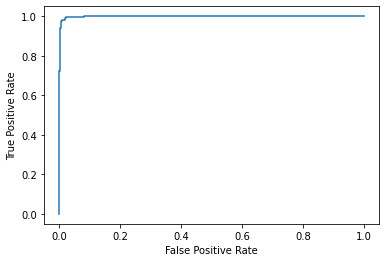

In [ ]:
# Plot ROC curve
# define metrics
from sklearn import metrics
y_pred_proba2 = model_tune.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

# **Challenging the solution**

## ***K-Nearest Neighbours (KNN)***

In [ ]:
# Splitting our dataset

X_knn = final_df.drop(['Churn', 'CustomerID'], axis=1).values
y_knn = final_df['Churn'].values

# Perform oversampling
os = RandomOverSampler(sampling_strategy=0.5)
X_res_knn, y_res_knn = os.fit_resample(X_knn,y_knn)

In [ ]:
# Splitting the data into test and train sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_res_knn,y_res_knn, test_size = 0.2, random_state = 42)

# scaling our Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train_knn)
X_test_knn = sc.transform(X_test_knn)


# Reducing the dimensions in our dataset
# Specifying the number of components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train_knn = lda.fit_transform(X_train_knn, y_train_knn)
X_test_knn = lda.transform(X_test_knn)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
        
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = 10,
                       n_jobs = -1)
          
rs = rs.fit(X_train_knn, y_train_knn)
rs.best_params_

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
# Apply the hyperparameters to our model

knc = KNeighborsClassifier(metric = 'minkowski', n_neighbors= 2, weights = 'distance')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train_knn, y_train_knn)


# Making prediction the created model
y_pred_knn = model2.predict(X_test_knn)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test_knn, y_pred_knn)*100)
print("Confusion Matrix : \n", confusion_matrix(y_test_knn, y_pred_knn))
# Classification report
print(classification_report(y_test_knn, y_pred_knn))

91.81494661921708
Confusion Matrix : 
 [[855  88]
 [ 27 435]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       943
           1       0.83      0.94      0.88       462

    accuracy                           0.92      1405
   macro avg       0.90      0.92      0.91      1405
weighted avg       0.92      0.92      0.92      1405



Our KNN model after hyperparameter tuning has an accuracy score of 91.81% with 1,290 correct predictions and 115 incorrect predictions. The model scored 91% in terms of F1 score

In [ ]:
# Evaluate the train dataset to check for overfitting 
predict_knn = model2.predict(X_train_knn)
print("Confussion Matrix : \n", confusion_matrix(y_train_knn, predict_knn))

print("The accuracy of our model is: ", accuracy_score(y_train_knn, predict_knn)*100)


Confussion Matrix : 
 [[3739    0]
 [   0 1879]]
The accuracy of our model is:  100.0


# **Conclusion**

Most customers who churned:



1.   were male
2.   used debit cards as their preferred mode of payment
3.   had made complaints
4.   used mobile phones as their preferred login device
5.   lived a distance of 14 from the warehouse 
6.   were single
7.   had 4 devices registered



# Models

## Random Forest

Our Base random forest model has an accuracy score of 98.86% with 1,389 correct predictions and 16 incorrect predictions. The model also scored 99% in terms of F1 score.After tuning the model performed performance did not change.


## SVM
Our SVM (Polynomial) model after hyperparameter tuning has an accuracy score of 98.36% with 1,382 correct predictions and 23 incorrect predictions. The model also scored 98% in terms of F1 score.

## Gradient Boost
Our base gradient boost model has an accuracy score of 97.15% with 1365 correct predictions and 40 incorrect predictions. The model also has an F1 score of 97%.After tuning our hyperparameters our model performed at an accuracy score of
99.29% with 1,395 correct predictions and 10 incorrect predictions. The model also scored 99% in terms of F1 score


## KNN
Our KNN model after hyperparameter tuning has an accuracy score of 91.81% with 1,299 correct predictions and 106 incorrect predictions. The model scored 92% in terms of F1 score.



# **Recommendations**

1. Preemptively engaging at risk customers by offering them something special; a promo, discount, loyalty program, etc. This small effort can go a long way when it comes to showing your customers how much you value their business.

2. Establishing more warehouses to ensure that customers have easy access to the warehouse, this would also reduce time taken in our door step delivery.

3. Aiding in partial coverage of the transaction cost incurred by customers in the different modes of payments

4. Develop a complaints handling policy. It should include reassuring customers that you value their feedback and you are committed to resolving their issues in a fair, timely and efficient manner.

5. Following up on customer complaint ,incase of defective product claims the involved seller should be barred from making sales in our websites/mobile applications.

6. Optimize your E-Commerce Website For Mobile Devices by Speeding up your website for mobile devices and ensure that your content is mobile-optimized and also ensuring there are no pop ups on your website


We recommend the Gradient boost model(after applying our hyperparameters) with an accuracy score of 99%